<a href="https://colab.research.google.com/github/ankit4488kumar/Data-Science-Projects-Materials/blob/main/Bank_Data_Exploration/bank_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [2]:
df = pd.read_excel("bank.xlsx")

In [3]:
df.head()

Account No       DATE               TRANSACTION DETAILS  CHQ.NO.  \
0  409000611074' 2017-06-29  TRF FROM  Indiaforensic SERVICES      NaN   
1  409000611074' 2017-07-05  TRF FROM  Indiaforensic SERVICES      NaN   
2  409000611074' 2017-07-18        FDRL/INTERNAL FUND TRANSFE      NaN   
3  409000611074' 2017-08-01   TRF FRM  Indiaforensic SERVICES      NaN   
4  409000611074' 2017-08-16        FDRL/INTERNAL FUND TRANSFE      NaN   

  VALUE DATE  WITHDRAWAL AMT  DEPOSIT AMT  BALANCE AMT  .  
0 2017-06-29             NaN    1000000.0    1000000.0  .  
1 2017-07-05             NaN    1000000.0    2000000.0  .  
2 2017-07-18             NaN     500000.0    2500000.0  .  
3 2017-08-01             NaN    3000000.0    5500000.0  .  
4 2017-08-16             NaN     500000.0    6000000.0  .

In [4]:
def date_to_float(date_data):
    return (date_data - date_data.min())  / np.timedelta64(1,'D')


In [5]:
df["DATE DAYS"] = date_to_float(df["VALUE DATE"])
dates = pd.Series(df["DATE"])
df["YEAR"] = dates.dt.year
df["MONTH"] = dates.dt.month
df["WEEK"] = dates.dt.isocalendar().week
df["DAY"] = dates.dt.day
df["DAYOFWEEK"] = dates.dt.dayofweek
df["Account No"] = df["Account No"].replace(df["Account No"].unique(),["A","B","C","D","E","F","G","H","I","J"])

In [6]:
df["DATE DAYS"] = date_to_float(df["VALUE DATE"])
#dates = pd.Series(df["DATE"])
df['DATE'] = pd.to_datetime(df['DATE'])
df["YEAR"] = df['DATE'].dt.year
df["MONTH"] = df['DATE'].dt.month
df["WEEK"] = df['DATE'].dt.isocalendar().week
df["DAY"] = df['DATE'].dt.day
df["DAYOFWEEK"] = df['DATE'].dt.dayofweek


In [7]:
df.head()

Account No       DATE               TRANSACTION DETAILS  CHQ.NO. VALUE DATE  \
0          A 2017-06-29  TRF FROM  Indiaforensic SERVICES      NaN 2017-06-29   
1          A 2017-07-05  TRF FROM  Indiaforensic SERVICES      NaN 2017-07-05   
2          A 2017-07-18        FDRL/INTERNAL FUND TRANSFE      NaN 2017-07-18   
3          A 2017-08-01   TRF FRM  Indiaforensic SERVICES      NaN 2017-08-01   
4          A 2017-08-16        FDRL/INTERNAL FUND TRANSFE      NaN 2017-08-16   

   WITHDRAWAL AMT  DEPOSIT AMT  BALANCE AMT  .  DATE DAYS  YEAR  MONTH  WEEK  \
0             NaN    1000000.0    1000000.0  .      910.0  2017      6    26   
1             NaN    1000000.0    2000000.0  .      916.0  2017      7    27   
2             NaN     500000.0    2500000.0  .      929.0  2017      7    29   
3             NaN    3000000.0    5500000.0  .      943.0  2017      8    31   
4             NaN     500000.0    6000000.0  .      958.0  2017      8    33   

   DAY  DAYOFWEEK  
0   29          3  
1    5          2  
2   18          1  
3    1          1  
4   16          2

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116201 entries, 0 to 116200
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Account No           116201 non-null  object        
 1   DATE                 116201 non-null  datetime64[ns]
 2   TRANSACTION DETAILS  113702 non-null  object        
 3   CHQ.NO.              905 non-null     float64       
 4   VALUE DATE           116201 non-null  datetime64[ns]
 5   WITHDRAWAL AMT       53549 non-null   float64       
 6   DEPOSIT AMT          62652 non-null   float64       
 7   BALANCE AMT          116201 non-null  float64       
 8   .                    116201 non-null  object        
 9   DATE DAYS            116201 non-null  float64       
 10  YEAR                 116201 non-null  int64         
 11  MONTH                116201 non-null  int64         
 12  WEEK                 116201 non-null  UInt32        
 13  DAY           

In [9]:
df.isnull().sum()

Account No                  0
DATE                        0
TRANSACTION DETAILS      2499
CHQ.NO.                115296
VALUE DATE                  0
WITHDRAWAL AMT          62652
DEPOSIT AMT             53549
BALANCE AMT                 0
.                           0
DATE DAYS                   0
YEAR                        0
MONTH                       0
WEEK                        0
DAY                         0
DAYOFWEEK                   0
dtype: int64

In [10]:
df['Account No'].nunique()

10

In [11]:
df["Account No"] = df["Account No"].replace(df["Account No"].unique(),[f'A_{i}' for i in range(1,df['Account No'].nunique()+1)])

In [12]:
df.head()

Account No       DATE               TRANSACTION DETAILS  CHQ.NO. VALUE DATE  \
0        A_1 2017-06-29  TRF FROM  Indiaforensic SERVICES      NaN 2017-06-29   
1        A_1 2017-07-05  TRF FROM  Indiaforensic SERVICES      NaN 2017-07-05   
2        A_1 2017-07-18        FDRL/INTERNAL FUND TRANSFE      NaN 2017-07-18   
3        A_1 2017-08-01   TRF FRM  Indiaforensic SERVICES      NaN 2017-08-01   
4        A_1 2017-08-16        FDRL/INTERNAL FUND TRANSFE      NaN 2017-08-16   

   WITHDRAWAL AMT  DEPOSIT AMT  BALANCE AMT  .  DATE DAYS  YEAR  MONTH  WEEK  \
0             NaN    1000000.0    1000000.0  .      910.0  2017      6    26   
1             NaN    1000000.0    2000000.0  .      916.0  2017      7    27   
2             NaN     500000.0    2500000.0  .      929.0  2017      7    29   
3             NaN    3000000.0    5500000.0  .      943.0  2017      8    31   
4             NaN     500000.0    6000000.0  .      958.0  2017      8    33   

   DAY  DAYOFWEEK  
0   29          3  
1    5          2  
2   18          1  
3    1          1  
4   16          2

Statstical Metrices

In [13]:
# Creating some statsticals measures

unique_accounts = df["Account No"].unique()
balance_mins = []
balance_maxs = []
balance_means = []
balance_meds = []
deposit_mins = []
deposit_maxs = []
deposit_means = []
deposit_number = []
deposit_meds = []
withdrawal_mins = []
withdrawal_maxs = []
withdrawal_means = []
withdrawal_number = []
withdrawal_meds = []
for acc in unique_accounts:
    balance_mins.append(df[df["Account No"] == acc][["BALANCE AMT"]].min().values[0])
    balance_maxs.append(df[df["Account No"] == acc][["BALANCE AMT"]].max().values[0])
    balance_means.append(df[df["Account No"] == acc][["BALANCE AMT"]].mean().values[0])
    balance_meds.append(df[df["Account No"] == acc][["BALANCE AMT"]].median().values[0])

    deposit_mins.append(df[df["Account No"] == acc][["DEPOSIT AMT"]].min().values[0])
    deposit_maxs.append(df[df["Account No"] == acc][["DEPOSIT AMT"]].max().values[0])
    deposit_means.append(df[df["Account No"] == acc][["DEPOSIT AMT"]].mean().values[0])
    deposit_number.append(df[df["Account No"] == acc][["DEPOSIT AMT"]].count().values[0])
    deposit_meds.append(df[df["Account No"] == acc][["DEPOSIT AMT"]].median().values[0])

    withdrawal_mins.append(df[df["Account No"] == acc][["WITHDRAWAL AMT"]].min().values[0])
    withdrawal_maxs.append(df[df["Account No"] == acc][["WITHDRAWAL AMT"]].max().values[0])
    withdrawal_means.append(df[df["Account No"] == acc][["WITHDRAWAL AMT"]].mean().values[0])
    withdrawal_number.append(df[df["Account No"] == acc][["WITHDRAWAL AMT"]].count().values[0])
    withdrawal_meds.append(df[df["Account No"] == acc][["WITHDRAWAL AMT"]].median().values[0])


In [14]:
balance_mins

[138355.0,
 463186.3799999956,
 -359270114.65,
 -558752028.14,
 -548274740.610001,
 -547539062.5500001,
 -546314194.4100006,
 -2045201141.9100037,
 -1819376017.0700045,
 -1996535928.1000102]

In [15]:
#creating accounts data
account_data = pd.DataFrame(list(zip(unique_accounts, deposit_number, deposit_mins, deposit_maxs, deposit_means, deposit_meds, withdrawal_number, withdrawal_mins, withdrawal_maxs, withdrawal_means, withdrawal_meds, balance_mins, balance_maxs, balance_means, balance_meds)),
                           columns=["Account No","DEPOSIT N°","DEPOSIT MIN", "DEPOSIT MAX", "DEPOSIT MEAN", "DEPOSIT MEDIAN", "WITHDRAWAL N°", "WITHDRAWAL MIN", "WITHDRAWAL MAX","WITHDRAWAL MEAN", "WITHDRAWAL MEDIAN", "BALANCE MIN", "BALANCE MAX", "BALANCE MEAN", "BALANCE MEDIAN"]).round()
account_data

Account No  DEPOSIT N°  DEPOSIT MIN  DEPOSIT MAX  DEPOSIT MEAN  \
0        A_1         315       1320.0    3000000.0      463046.0   
1        A_2         469          1.0    1000000.0      203964.0   
2        A_3         774          1.0   15000000.0       34925.0   
3        A_4          23        500.0  202100000.0     9947183.0   
4        A_5        3255          0.0  170250000.0     1445745.0   
5        A_6         787          0.0   15000000.0      129872.0   
6        A_7        5063          0.0  544800000.0     3397676.0   
7        A_8        5511          1.0  500000000.0     8324966.0   
8        A_9       32092          1.0  211959442.0     2130827.0   
9       A_10       14363          0.0  200000000.0     7082151.0   

   DEPOSIT MEDIAN  WITHDRAWAL N°  WITHDRAWAL MIN  WITHDRAWAL MAX  \
0        500000.0            778           120.0        912000.0   
1        200000.0            575             2.0       2500000.0   
2          5000.0             28             1.0     354000000.0   
3        250000.0             28            21.0     170000000.0   
4        727827.0           1333             0.0     240000000.0   
5           108.0           5227             0.0      15000000.0   
6          8949.0           8391             0.0     400000000.0   
7       6500000.0           5025             0.0     459447546.0   
8        313510.0          16687             0.0     150000000.0   
9       5000000.0          15477             1.0     141366239.0   

   WITHDRAWAL MEAN  WITHDRAWAL MEDIAN   BALANCE MIN   BALANCE MAX  \
0         186886.0           115705.0  1.383550e+05  8.500000e+06   
1         165875.0           112779.0  4.631860e+05  3.273973e+06   
2       13732508.0            90784.0 -3.592701e+08  1.901582e+06   
3       15011353.0          2110292.0 -5.587520e+08 -3.564159e+08   
4        3530046.0          2000000.0 -5.482747e+08 -3.080176e+08   
5          19247.0             3000.0 -5.475391e+08 -4.798730e+08   
6        2049348.0             2020.0 -5.463142e+08 -1.514640e+06   
7        9338476.0         10000000.0 -2.045201e+09 -5.399234e+08   
8        4103963.0           500000.0 -1.819376e+09 -1.470464e+09   
9        6586232.0            57882.0 -1.996536e+09 -1.113805e+09   

   BALANCE MEAN  BALANCE MEDIAN  
0  1.478073e+06    1.261196e+06  
1  9.981640e+05    9.462800e+05  
2 -4.703390e+06    1.092580e+06  
3 -4.766824e+08   -5.467218e+08  
4 -5.437807e+08   -5.459235e+08  
5 -5.447039e+08   -5.452666e+08  
6 -5.294276e+08   -5.319314e+08  
7 -1.523125e+09   -1.536200e+09  
8 -1.669130e+09   -1.680812e+09  
9 -1.771448e+09   -1.847921e+09

Statstical Exploration

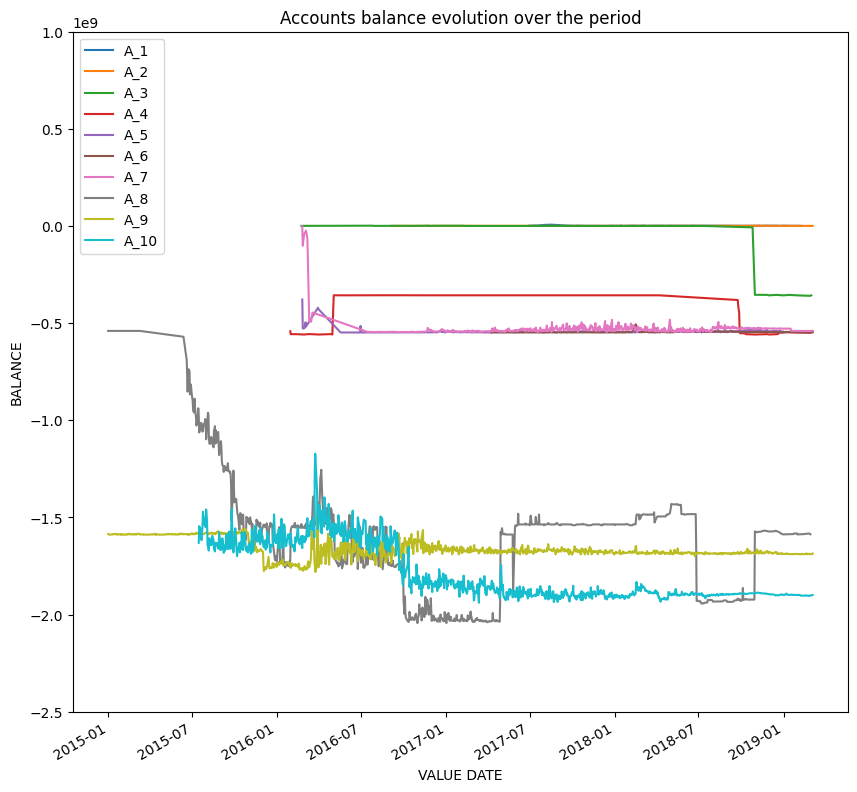

In [16]:
ax = 0
for acc in unique_accounts:
    if ax == 0:
        ax = df[df["Account No"] == acc][["Account No","VALUE DATE","BALANCE AMT"]].rename(columns={"BALANCE AMT":acc}).groupby(["VALUE DATE"]).mean().plot(ylabel="BALANCE",ylim=(-2500000000,1000000000), figsize=(10,10))
    else :
        df[df["Account No"] == acc][["Account No","VALUE DATE","BALANCE AMT"]].rename(columns={"BALANCE AMT":acc}).groupby(["VALUE DATE"]).mean().plot(ax=ax, ylabel="BALANCE", ylim=(-2500000000,1000000000), figsize=(10,10)).set_title("Accounts balance evolution over the period")


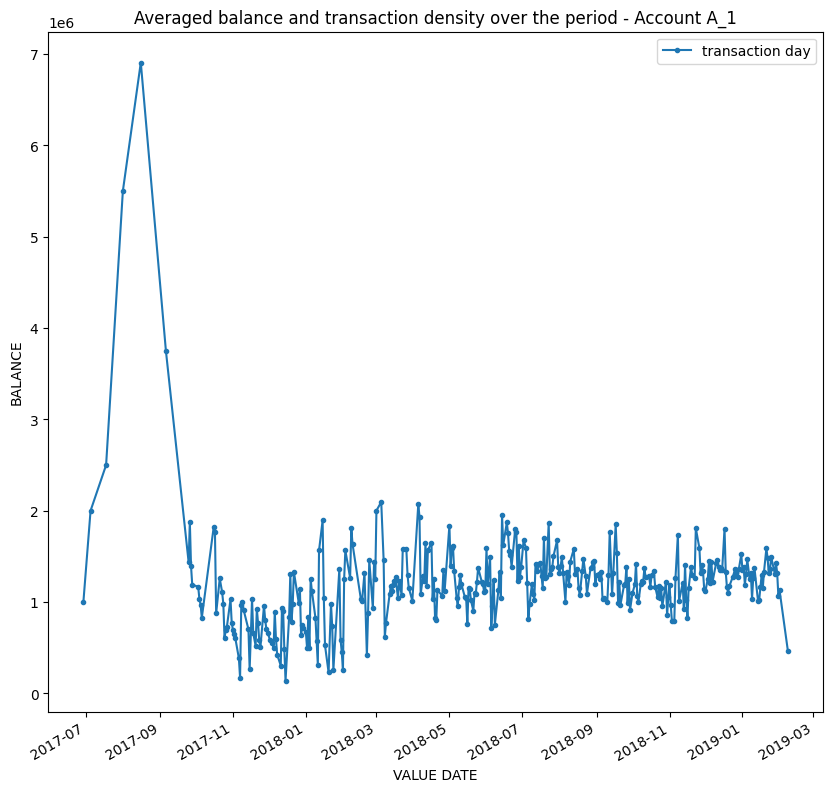

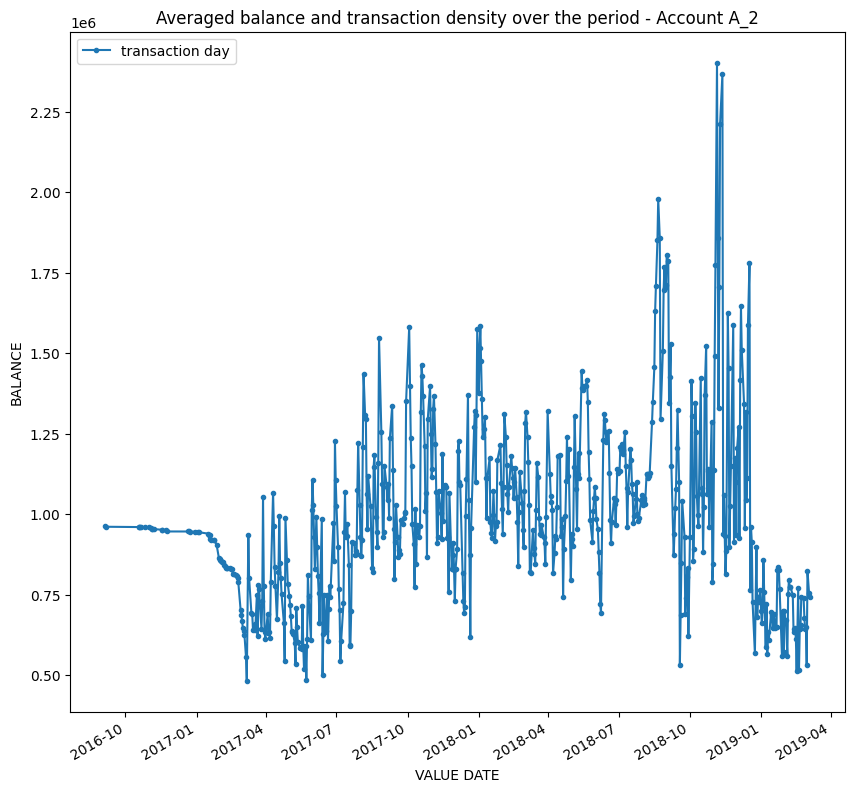

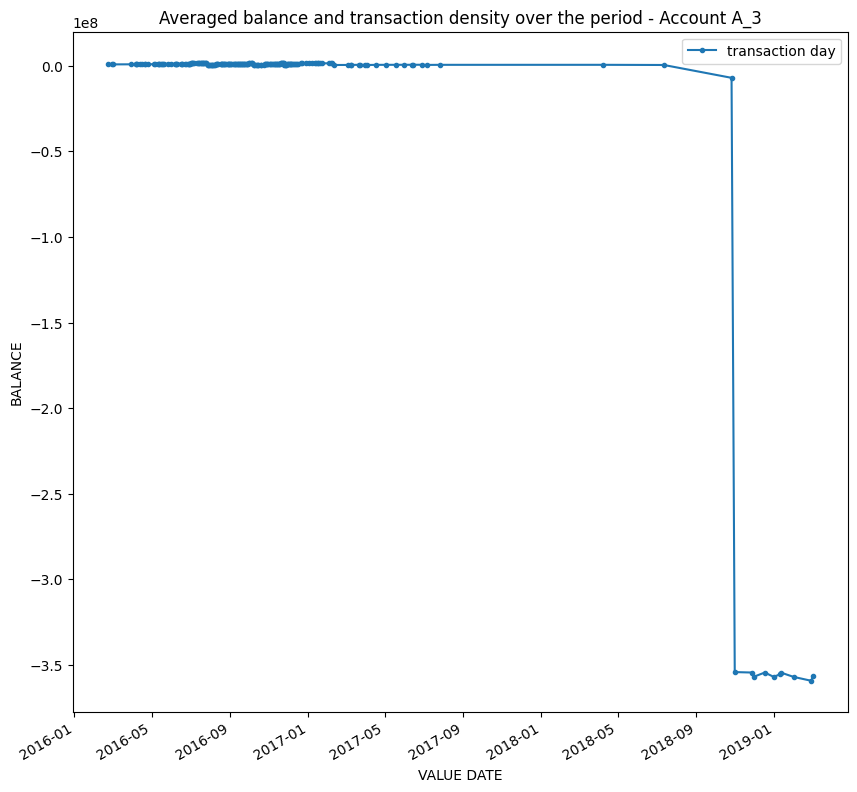

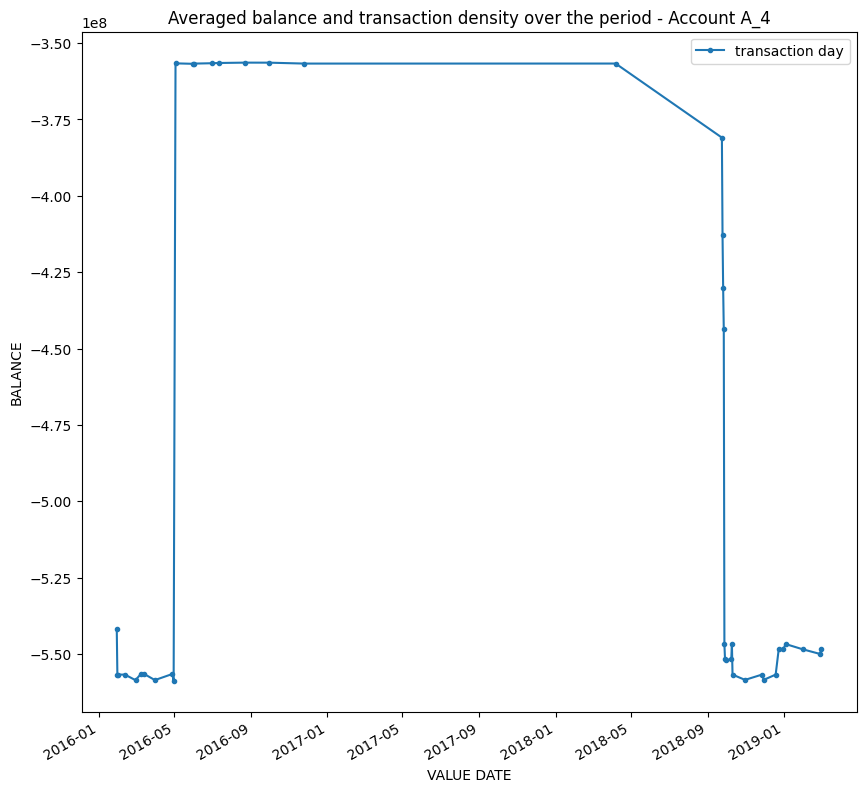

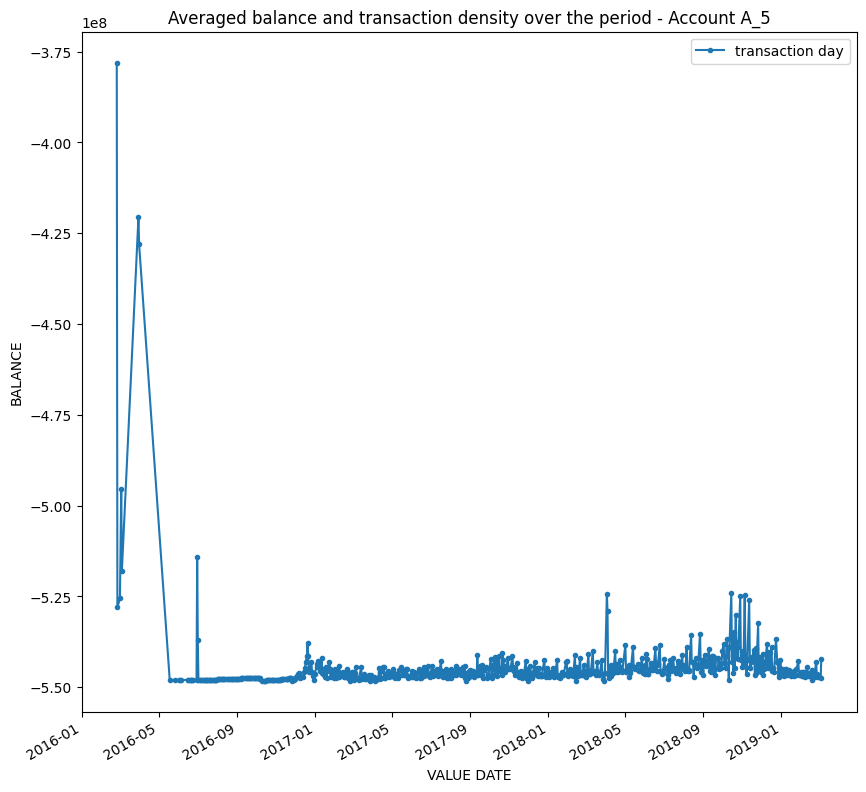

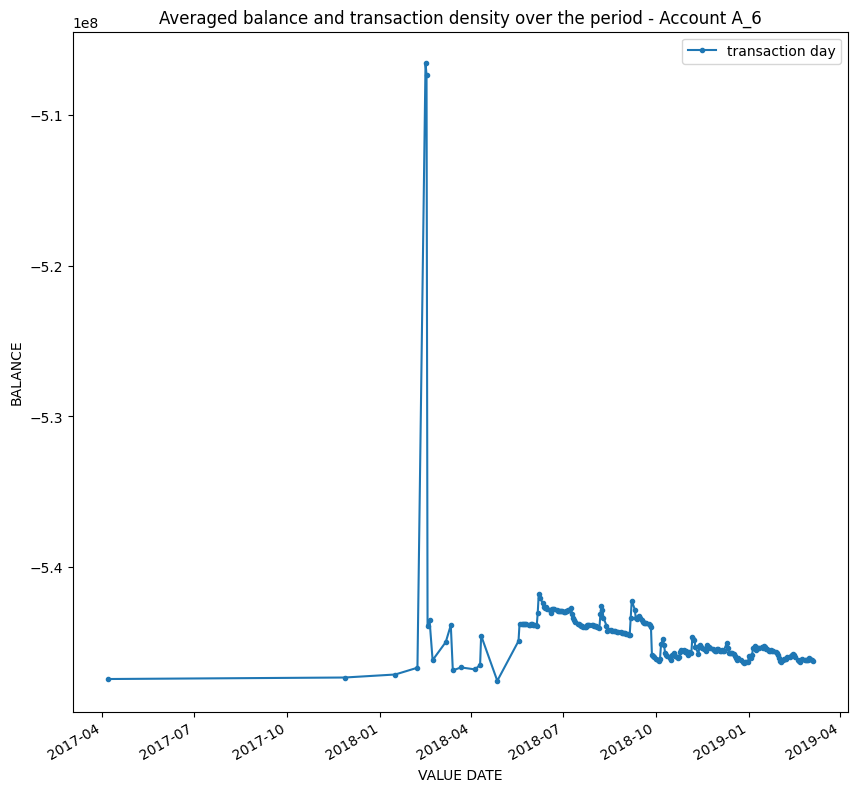

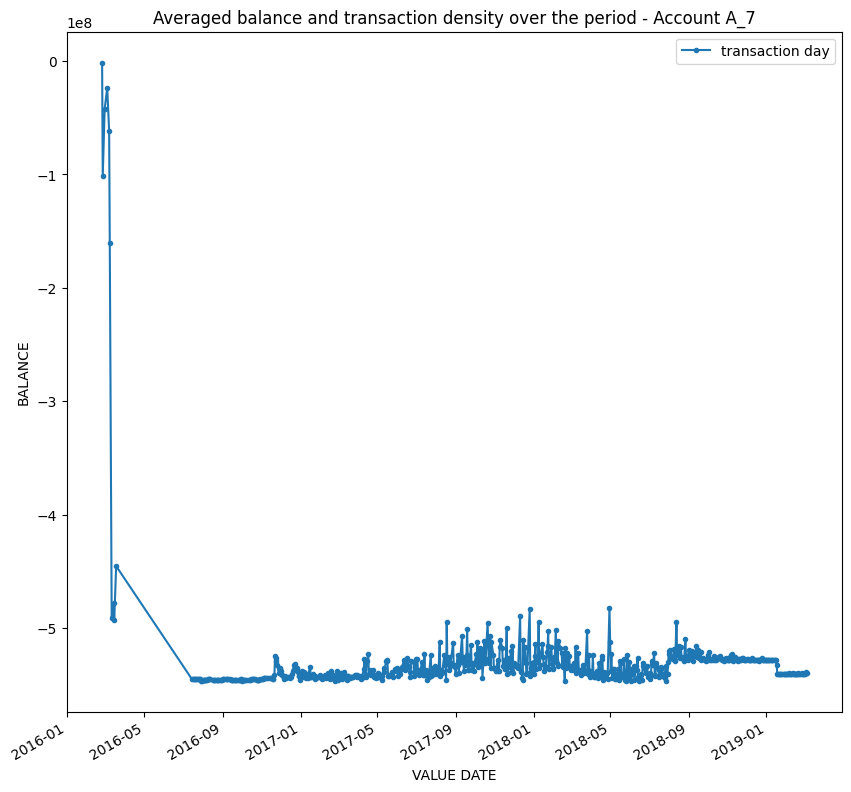

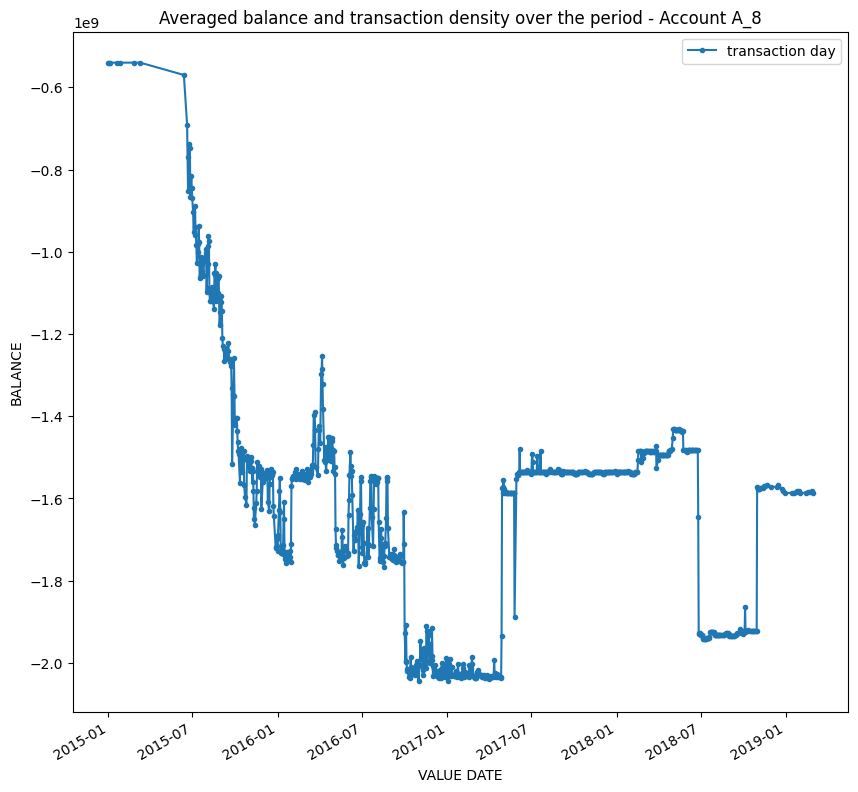

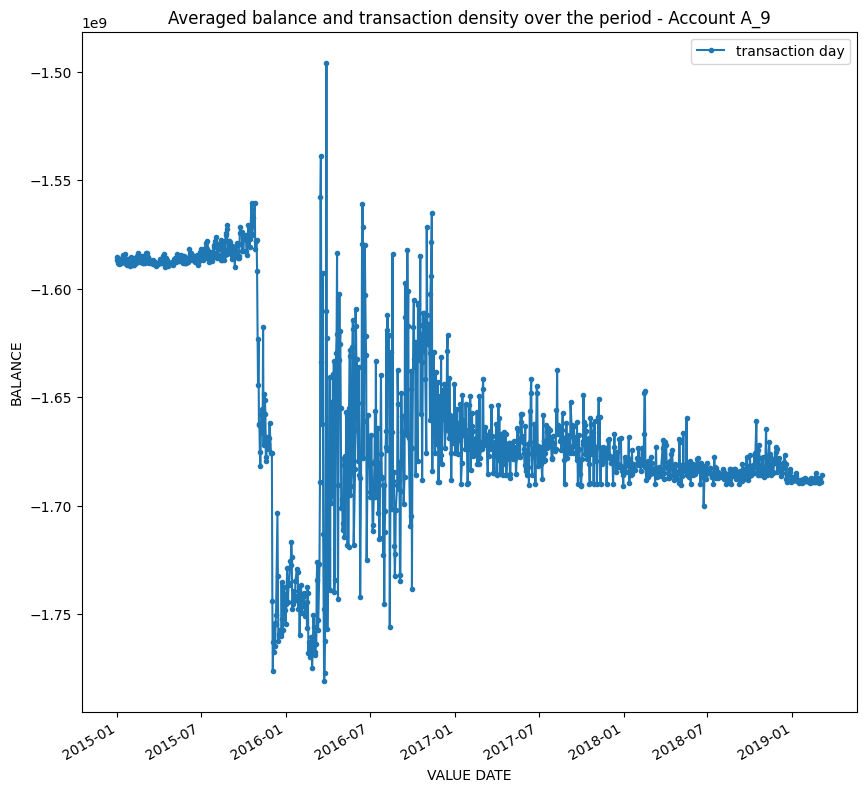

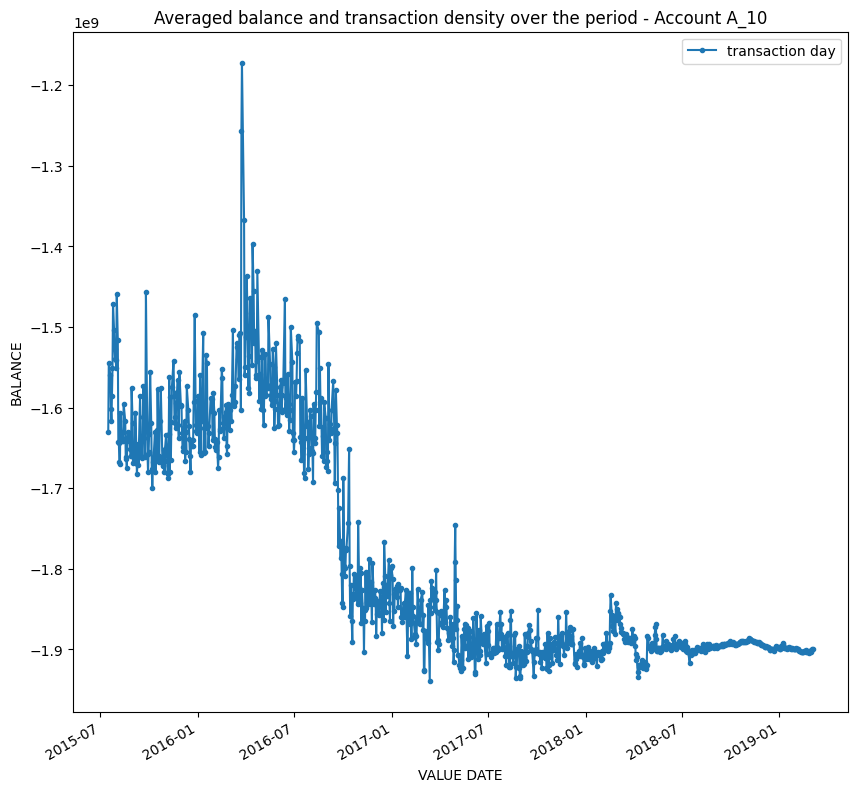

In [17]:
#Transation Density
for acc in unique_accounts:
    df[df["Account No"] == acc][["Account No","VALUE DATE","BALANCE AMT"]].rename(columns={"BALANCE AMT": "transaction day"}).groupby(["VALUE DATE"]).mean().plot(ylabel="BALANCE",style=".-",figsize=(10,10), title="Averaged balance and transaction density over the period - Account " + acc )

Transaction periodicity:-
Ratio of Deposite percentage and Withdrawals percentage

In [18]:
#For Deposite Percentage
deposits = []
for acc in unique_accounts:
    deposits.append(df[df["Account No"] == acc][["VALUE DATE","YEAR","MONTH","DAY","DAYOFWEEK","DEPOSIT AMT"]].rename(columns={"DEPOSIT AMT":acc+" : DEPOSIT"}).groupby(["VALUE DATE","YEAR","MONTH","DAY","DAYOFWEEK"]).count())
deposits = pd.concat(deposits)

deposits_percent = deposits
tot = deposits.groupby("MONTH").sum().sum(axis=0).to_numpy()
i = 0
for column in deposits:
    deposits_percent[column] = deposits[column]/tot[i]
    i = i + 1



In [19]:
deposits_percent

A_1 : DEPOSIT  A_2 : DEPOSIT  \
VALUE DATE YEAR MONTH DAY DAYOFWEEK                                 
2017-06-29 2017 6     29  3               0.003175            NaN   
2017-07-05 2017 7     5   2               0.003175            NaN   
2017-07-18 2017 7     18  1               0.003175            NaN   
2017-08-01 2017 8     1   1               0.003175            NaN   
2017-08-16 2017 8     16  2               0.019048            NaN   
...                                            ...            ...   
2019-02-28 2019 2     28  3                    NaN            NaN   
2019-03-01 2019 3     1   4                    NaN            NaN   
2019-03-02 2019 3     2   5                    NaN            NaN   
2019-03-04 2019 3     4   0                    NaN            NaN   
2019-03-05 2019 3     5   1                    NaN            NaN   

                                     A_3 : DEPOSIT  A_4 : DEPOSIT  \
VALUE DATE YEAR MONTH DAY DAYOFWEEK                                 
2017-06-29 2017 6     29  3                    NaN            NaN   
2017-07-05 2017 7     5   2                    NaN            NaN   
2017-07-18 2017 7     18  1                    NaN            NaN   
2017-08-01 2017 8     1   1                    NaN            NaN   
2017-08-16 2017 8     16  2                    NaN            NaN   
...                                            ...            ...   
2019-02-28 2019 2     28  3                    NaN            NaN   
2019-03-01 2019 3     1   4                    NaN            NaN   
2019-03-02 2019 3     2   5                    NaN            NaN   
2019-03-04 2019 3     4   0                    NaN            NaN   
2019-03-05 2019 3     5   1                    NaN            NaN   

                                     A_5 : DEPOSIT  A_6 : DEPOSIT  \
VALUE DATE YEAR MONTH DAY DAYOFWEEK                                 
2017-06-29 2017 6     29  3                    NaN            NaN   
2017-07-05 2017 7     5   2                    NaN            NaN   
2017-07-18 2017 7     18  1                    NaN            NaN   
2017-08-01 2017 8     1   1                    NaN            NaN   
2017-08-16 2017 8     16  2                    NaN            NaN   
...                                            ...            ...   
2019-02-28 2019 2     28  3                    NaN            NaN   
2019-03-01 2019 3     1   4                    NaN            NaN   
2019-03-02 2019 3     2   5                    NaN            NaN   
2019-03-04 2019 3     4   0                    NaN            NaN   
2019-03-05 2019 3     5   1                    NaN            NaN   

                                     A_7 : DEPOSIT  A_8 : DEPOSIT  \
VALUE DATE YEAR MONTH DAY DAYOFWEEK                                 
2017-06-29 2017 6     29  3                    NaN            NaN   
2017-07-05 2017 7     5   2                    NaN            NaN   
2017-07-18 2017 7     18  1                    NaN            NaN   
2017-08-01 2017 8     1   1                    NaN            NaN   
2017-08-16 2017 8     16  2                    NaN            NaN   
...                                            ...            ...   
2019-02-28 2019 2     28  3                    NaN            NaN   
2019-03-01 2019 3     1   4                    NaN            NaN   
2019-03-02 2019 3     2   5                    NaN            NaN   
2019-03-04 2019 3     4   0                    NaN            NaN   
2019-03-05 2019 3     5   1                    NaN            NaN   

                                     A_9 : DEPOSIT  A_10 : DEPOSIT  
VALUE DATE YEAR MONTH DAY DAYOFWEEK                                 
2017-06-29 2017 6     29  3                    NaN             NaN  
2017-07-05 2017 7     5   2                    NaN             NaN  
2017-07-18 2017 7     18  1                    NaN             NaN  
2017-08-01 2017 8     1   1                    NaN             NaN  
2017-08-16 2017 8     16  2    

In [20]:
##For Withdrawals Percentage
withdrawals = []
for acc in unique_accounts:
    withdrawals.append(df[df["Account No"] == acc][["VALUE DATE","YEAR","MONTH","DAY","DAYOFWEEK","WITHDRAWAL AMT"]].rename(columns={"WITHDRAWAL AMT":acc+" : WITHDRAWAL"}).groupby(["VALUE DATE","YEAR","MONTH","DAY","DAYOFWEEK"]).count())
withdrawals = pd.concat(withdrawals)

withdrawals_percent = withdrawals
tot = withdrawals.groupby("MONTH").sum().sum(axis=0).to_numpy()
i = 0
for column in withdrawals:
    withdrawals_percent[column] = withdrawals[column]/tot[i]
    i = i + 1

In [21]:
withdrawals_percent

A_1 : WITHDRAWAL  A_2 : WITHDRAWAL  \
VALUE DATE YEAR MONTH DAY DAYOFWEEK                                       
2017-06-29 2017 6     29  3                  0.000000               NaN   
2017-07-05 2017 7     5   2                  0.000000               NaN   
2017-07-18 2017 7     18  1                  0.000000               NaN   
2017-08-01 2017 8     1   1                  0.000000               NaN   
2017-08-16 2017 8     16  2                  0.034704               NaN   
...                                               ...               ...   
2019-02-28 2019 2     28  3                       NaN               NaN   
2019-03-01 2019 3     1   4                       NaN               NaN   
2019-03-02 2019 3     2   5                       NaN               NaN   
2019-03-04 2019 3     4   0                       NaN               NaN   
2019-03-05 2019 3     5   1                       NaN               NaN   

                                     A_3 : WITHDRAWAL  A_4 : WITHDRAWAL  \
VALUE DATE YEAR MONTH DAY DAYOFWEEK                                       
2017-06-29 2017 6     29  3                       NaN               NaN   
2017-07-05 2017 7     5   2                       NaN               NaN   
2017-07-18 2017 7     18  1                       NaN               NaN   
2017-08-01 2017 8     1   1                       NaN               NaN   
2017-08-16 2017 8     16  2                       NaN               NaN   
...                                               ...               ...   
2019-02-28 2019 2     28  3                       NaN               NaN   
2019-03-01 2019 3     1   4                       NaN               NaN   
2019-03-02 2019 3     2   5                       NaN               NaN   
2019-03-04 2019 3     4   0                       NaN               NaN   
2019-03-05 2019 3     5   1                       NaN               NaN   

                                     A_5 : WITHDRAWAL  A_6 : WITHDRAWAL  \
VALUE DATE YEAR MONTH DAY DAYOFWEEK                                       
2017-06-29 2017 6     29  3                       NaN               NaN   
2017-07-05 2017 7     5   2                       NaN               NaN   
2017-07-18 2017 7     18  1                       NaN               NaN   
2017-08-01 2017 8     1   1                       NaN               NaN   
2017-08-16 2017 8     16  2                       NaN               NaN   
...                                               ...               ...   
2019-02-28 2019 2     28  3                       NaN               NaN   
2019-03-01 2019 3     1   4                       NaN               NaN   
2019-03-02 2019 3     2   5                       NaN               NaN   
2019-03-04 2019 3     4   0                       NaN               NaN   
2019-03-05 2019 3     5   1                       NaN               NaN   

                                     A_7 : WITHDRAWAL  A_8 : WITHDRAWAL  \
VALUE DATE YEAR MONTH DAY DAYOFWEEK                                       
2017-06-29 2017 6     29  3                       NaN               NaN   
2017-07-05 2017 7     5   2                       NaN               NaN   
2017-07-18 2017 7     18  1                       NaN               NaN   
2017-08-01 2017 8     1   1                       NaN               NaN   
2017-08-16 2017 8     16  2                       NaN               NaN   
...                                               ...               ...   
2019-02-28 2019 2     28  3                       NaN               NaN   
2019-03-01 2019 3     1   4                       NaN               NaN   
2019-03-02 2019 3     2   5                       NaN               NaN   
2019-03-04 2019 3     4   0                       NaN               NaN   
2019-03-05 2019 3     5   1                       NaN               NaN   

                                     A_9 : WITHDRAWAL  A_10 : WITHDRAWAL  
VALUE DATE YEAR MONTH DAY DAYOFWEEK                       

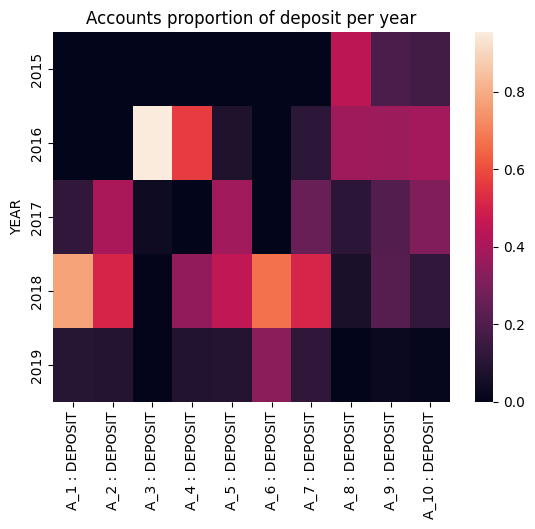

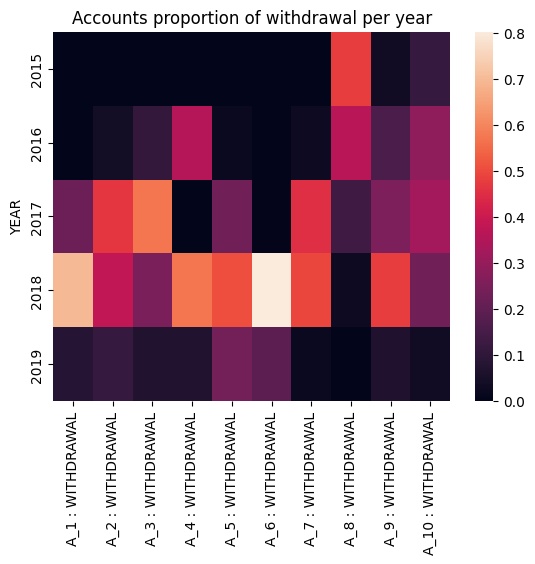

In [22]:
ax = plt.axes()
sns.heatmap(deposits_percent.groupby("YEAR").sum(), ax=ax)
ax.set_title("Accounts proportion of deposit per year")
plt.show()

ax = plt.axes()
sns.heatmap(withdrawals_percent.groupby("YEAR").sum(), ax=ax)
ax.set_title("Accounts proportion of withdrawal per year")
plt.show()

In [23]:
def absolute_maximum_scale(series):
    return series / series.abs().max()

balances = []
for acc in unique_accounts:
    balances.append(df[df["Account No"] == acc][["VALUE DATE","YEAR","MONTH","DAY","DAYOFWEEK","BALANCE AMT"]].rename(columns={"BALANCE AMT":acc+" : BALANCE MEAN"}).groupby(["VALUE DATE","YEAR","MONTH","DAY","DAYOFWEEK"]).mean())
balances = pd.concat(balances)
balances_proportion = balances
for col in balances_proportion.columns:
    balances_proportion[col] = absolute_maximum_scale(balances[col])

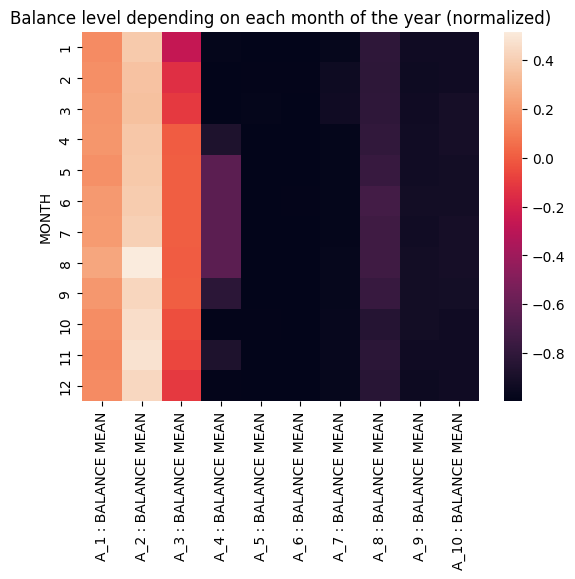

In [24]:
ax = plt.axes()
sns.heatmap(balances_proportion.groupby("MONTH").mean(), ax=ax)
ax.set_title("Balance level depending on each month of the year (normalized)")
plt.show()

In [25]:
def balance_prediction(account_no):
    X = df[df["Account No"] == account_no][["YEAR","MONTH","WEEK","DAYOFWEEK","DAY"]].drop_duplicates().to_numpy()
    y = df[df["Account No"] == account_no][["YEAR","MONTH","WEEK","DAYOFWEEK","DAY","BALANCE AMT"]].groupby(["YEAR","MONTH","WEEK","DAYOFWEEK","DAY"]).mean().to_numpy()
    #x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, stratify=[element > 1 for element in y.values])

    params = {
    "n_estimators": 500,
    "max_depth": 10,
    "learning_rate": 0.01,
    }
    lm = XGBRegressor()

    kf = KFold(n_splits=10, random_state=None, shuffle=True)

    for train_index , test_index in kf.split(X):
        X_train , X_test = X[train_index,:],X[test_index,:]
        y_train , y_test = y[train_index] , y[test_index]

        lm.fit(X_train,y_train)
        pred_values = lm.predict(X_test)

        r2 = f"R2 score: {r2_score(y_test[:,0], pred_values)}"
        print(r2)
        Val = pd.DataFrame({"ACTUAL": y_test[:,0], "PREDICTED": pred_values})
        Val.sort_values("ACTUAL").reset_index()[["ACTUAL", "PREDICTED"]].plot(title="Account : " + account_no, xlabel =r2)



Account : A_1
R2 score: -0.3932259448832567
R2 score: 0.18070649686350493
R2 score: -0.5301897566626692
R2 score: 0.7836609583270113
R2 score: 0.2075085771207732
R2 score: 0.4719580466919051
R2 score: 0.42044323741854717
R2 score: 0.0007686945357412434
R2 score: -0.30177014872448327
R2 score: 0.21702955683640313

Account : A_2
R2 score: 0.7867802976101995
R2 score: 0.5042321938066252
R2 score: 0.4897825362706739
R2 score: 0.5944085298489431
R2 score: 0.3957868734247516
R2 score: 0.3130398384549722
R2 score: 0.5759268111202199
R2 score: 0.3559318893218584
R2 score: 0.40621609096554134
R2 score: 0.6927474690800812

Account : A_3
R2 score: -0.0018976019004002254
R2 score: 0.9164230167170478
R2 score: 0.9684240091313959


c:\Users\User2\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


R2 score: 0.42964390856819445
R2 score: 0.41192461838079086
R2 score: 0.9409750210296913
R2 score: -0.1193341606621694
R2 score: 0.9999981651277574
R2 score: 0.9999577225518911
R2 score: 0.1582769050520504

Account : A_4
R2 score: 0.9915287553900471
R2 score: 0.47344512473423395
R2 score: 0.6199384169032691
R2 score: 0.9244515416163775
R2 score: -2.7289754917117843
R2 score: 0.7747115088653417
R2 score: 0.5420096241269314
R2 score: -0.24838633310934966
R2 score: -3.823564305659268
R2 score: 0.3055714617428472

Account : A_5
R2 score: 0.5844227875589214
R2 score: 0.5630645150569349
R2 score: 0.20488843672955603
R2 score: 0.27365972001866856
R2 score: 0.610142194659894
R2 score: -13.435376070824399
R2 score: -0.12153272658851066
R2 score: 0.45275031108796715
R2 score: 0.04089750478594756
R2 score: 0.2710003056604131

Account : A_6
R2 score: 0.7521112765184413
R2 score: -3.4085448681904236
R2 score: 0.8041687457235159
R2 score: 0.9499554922771121
R2 score: 0.863010880677077
R2 score: 0.95

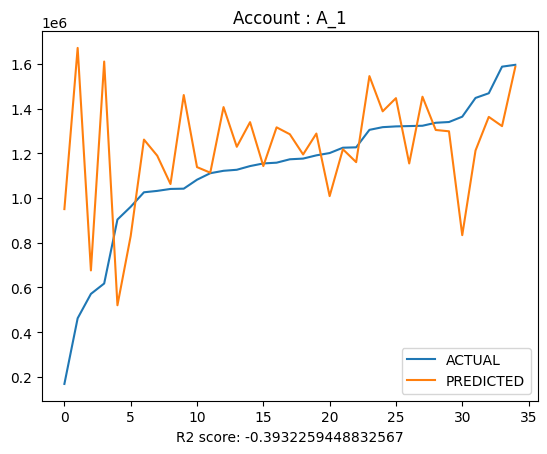

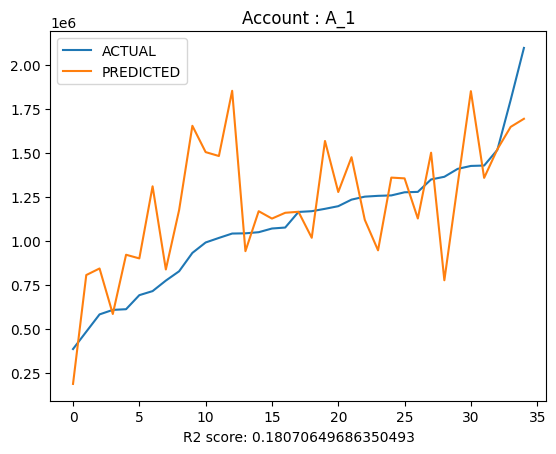

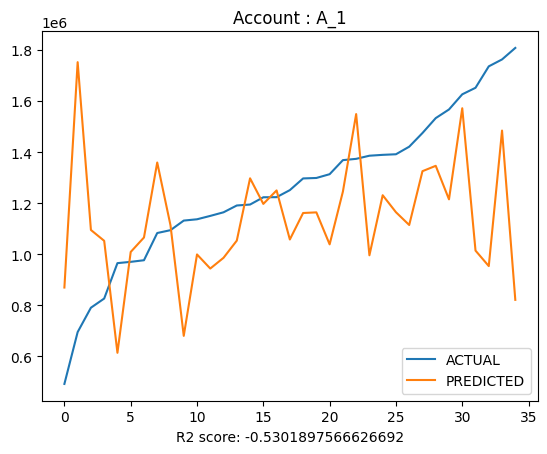

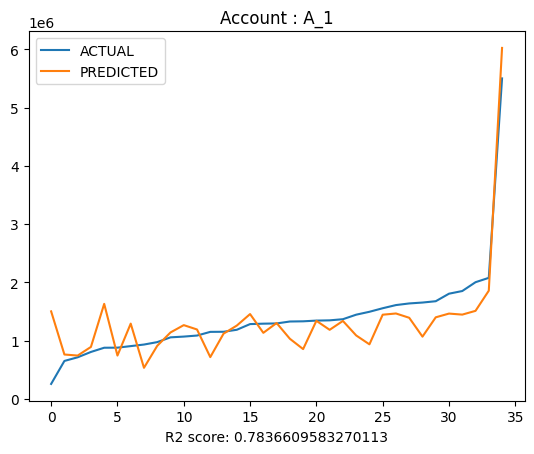

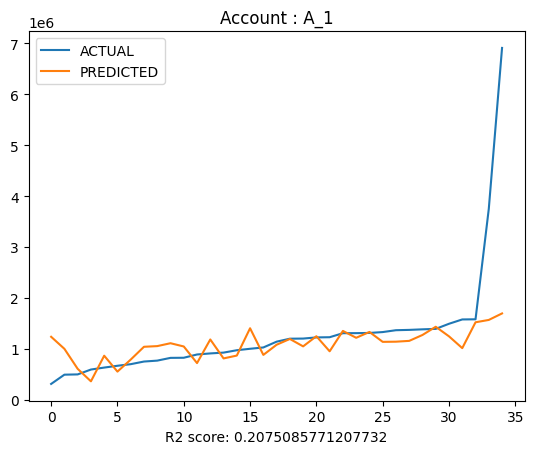

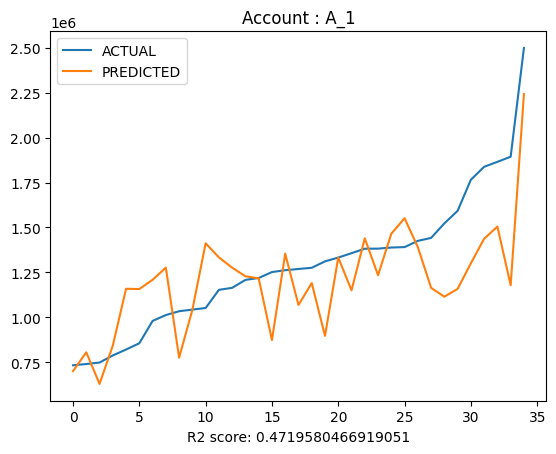

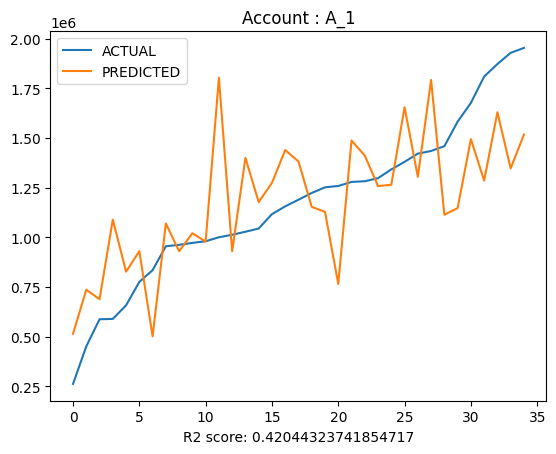

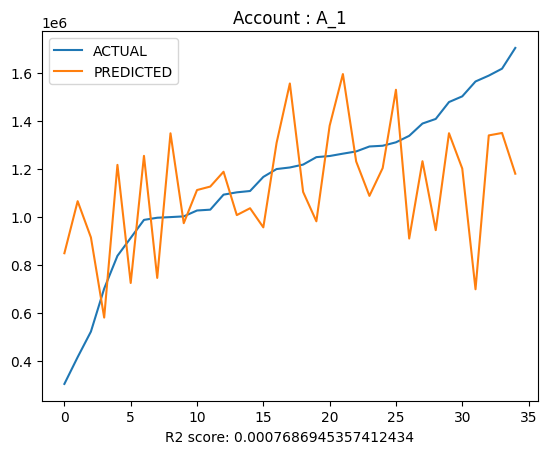

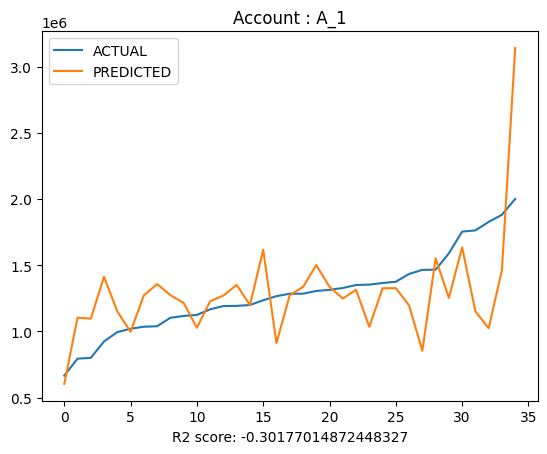

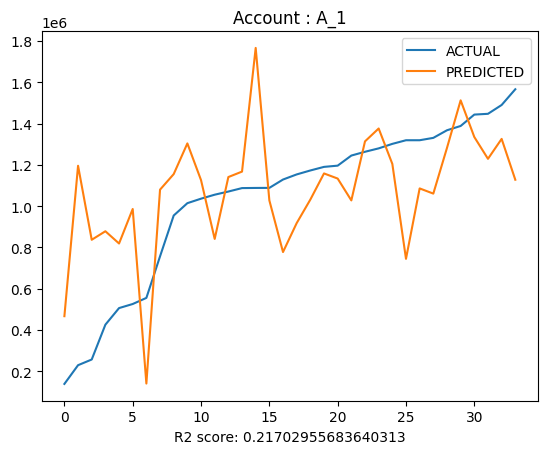

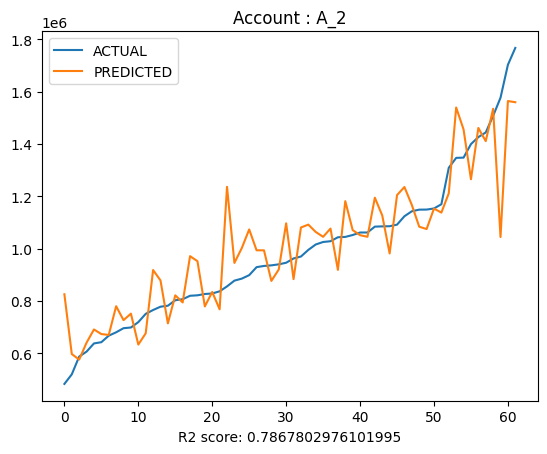

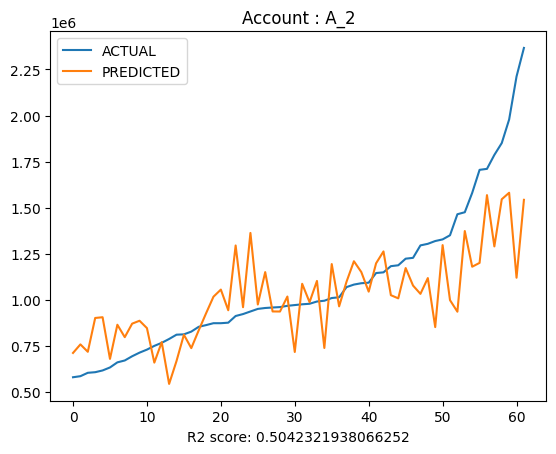

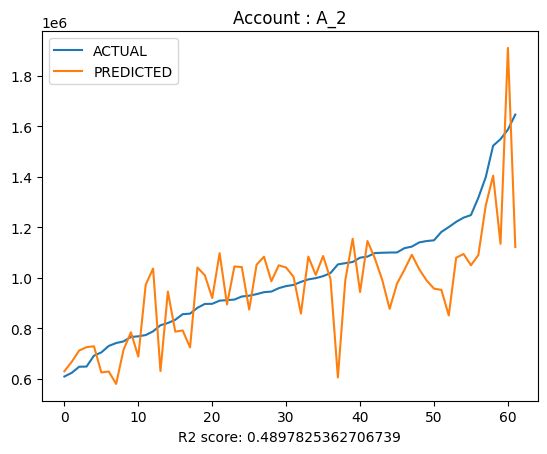

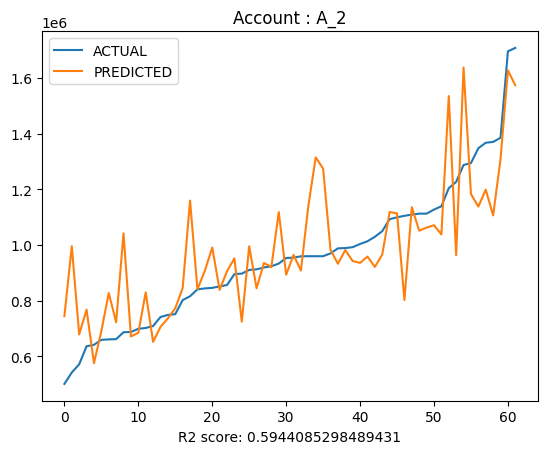

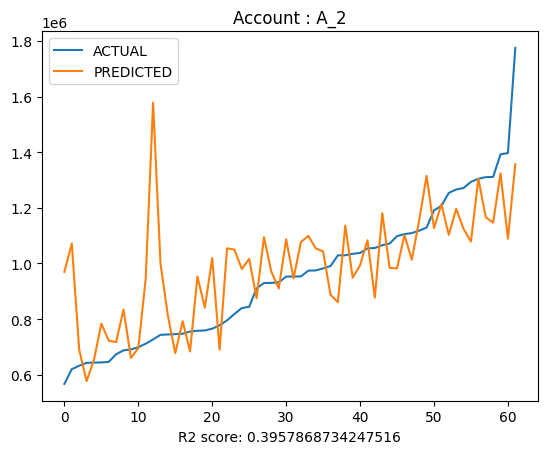

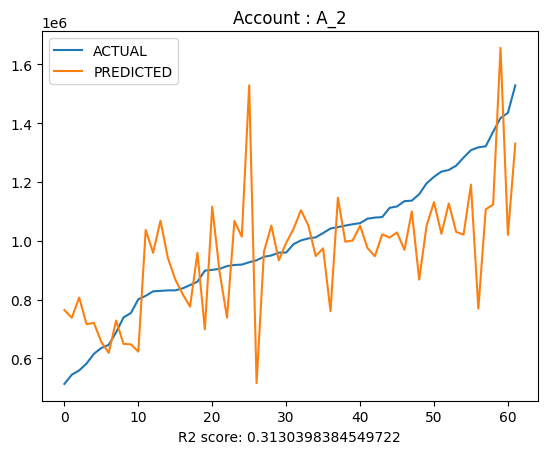

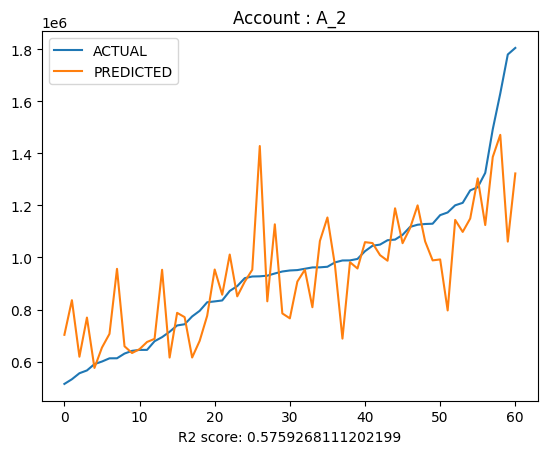

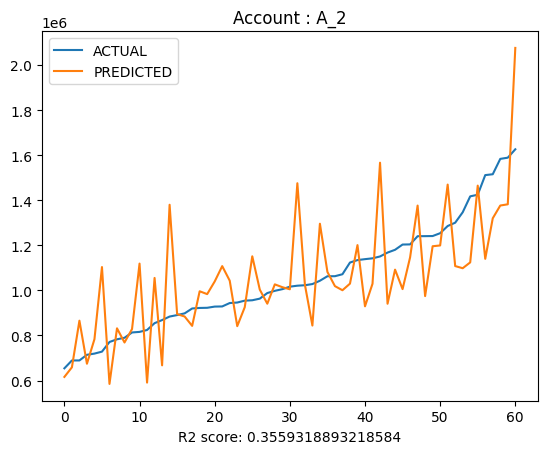

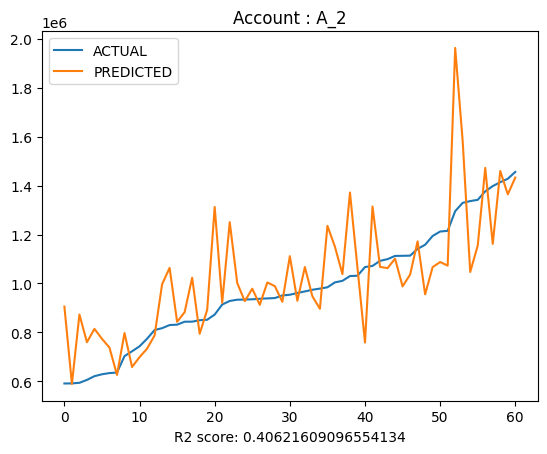

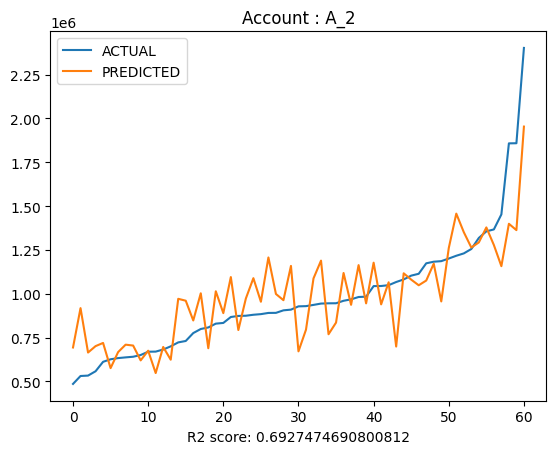

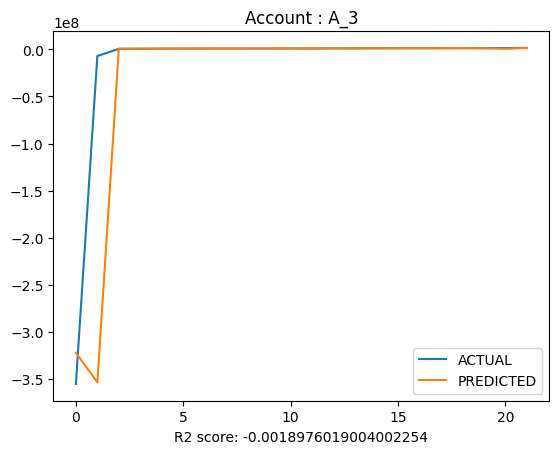

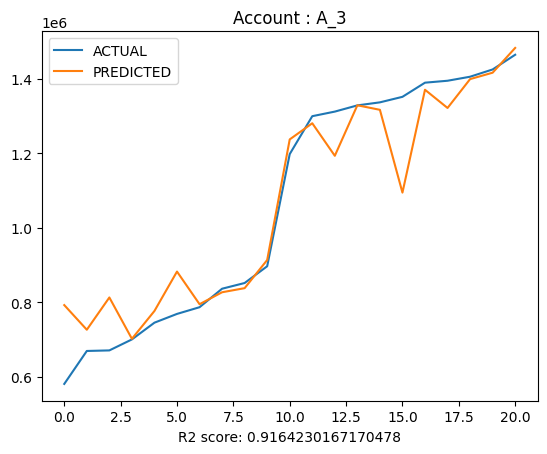

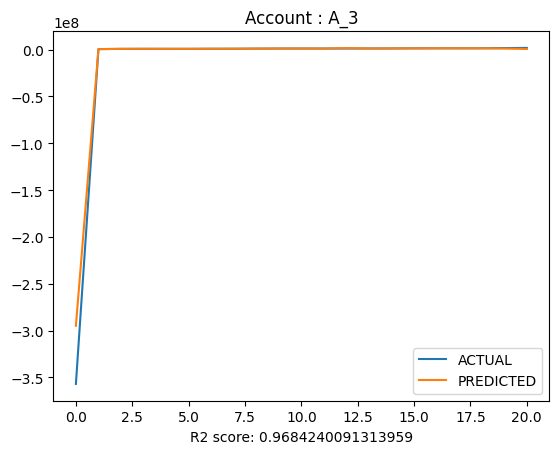

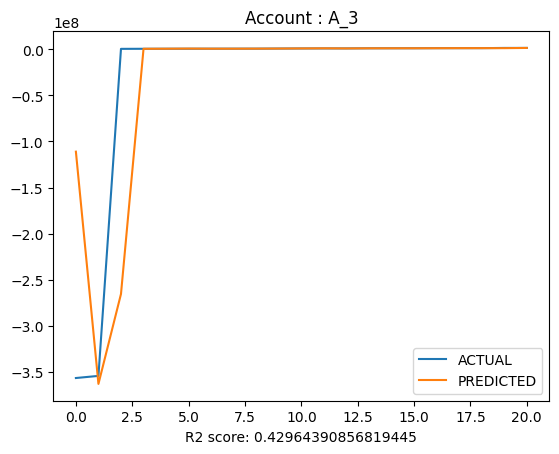

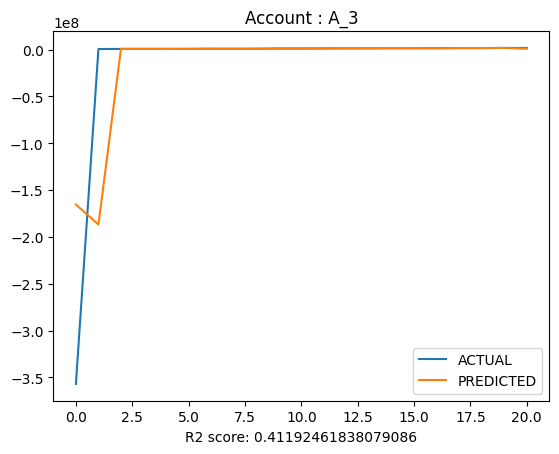

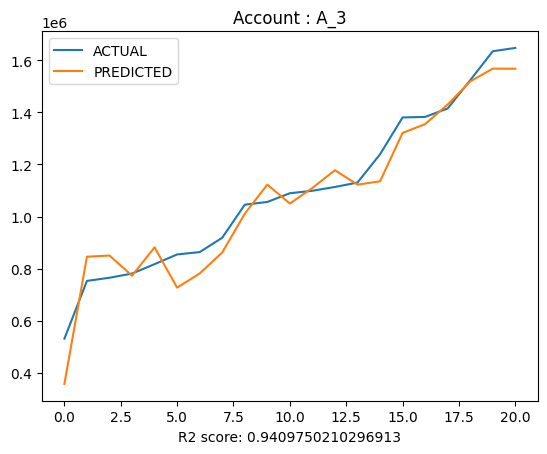

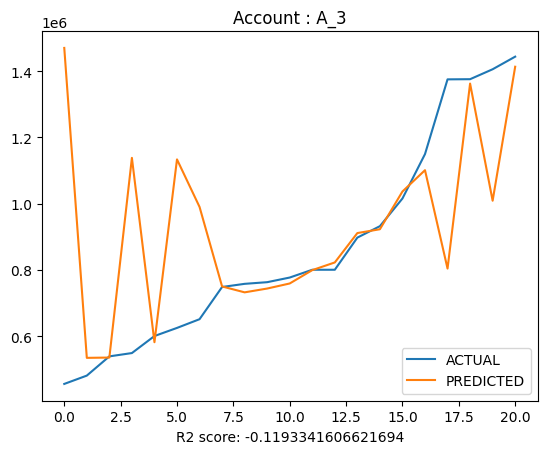

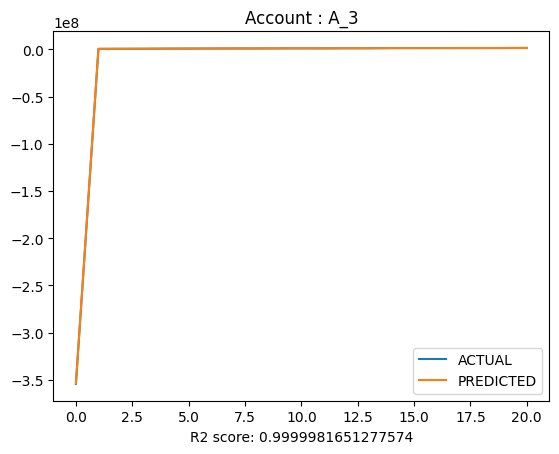

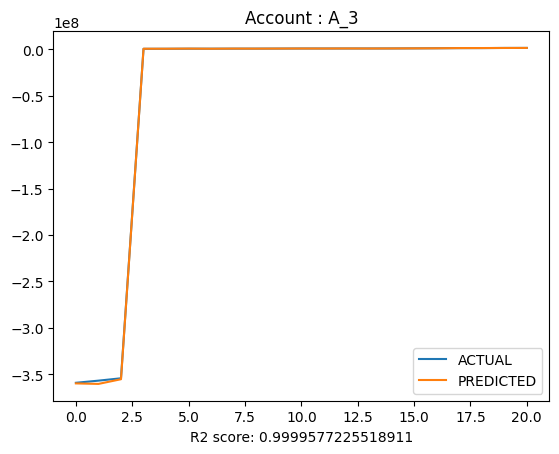

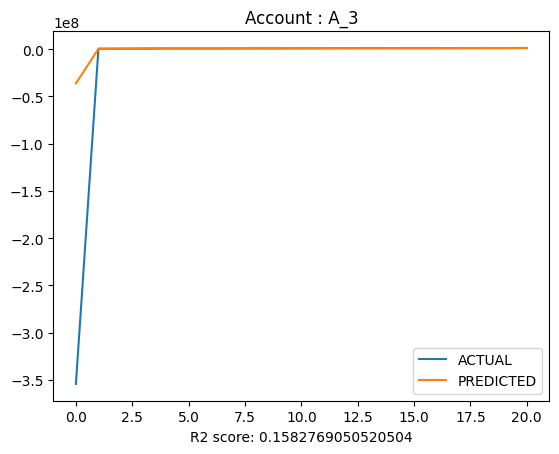

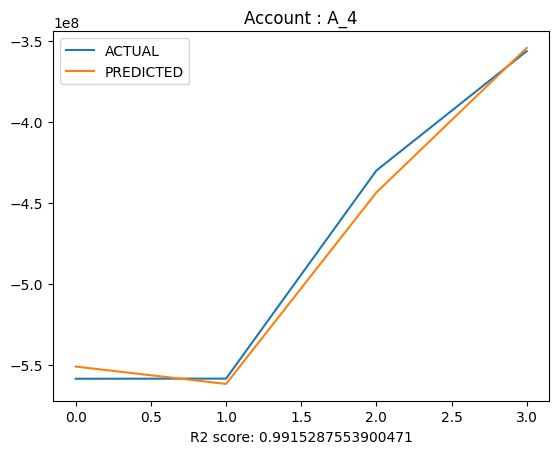

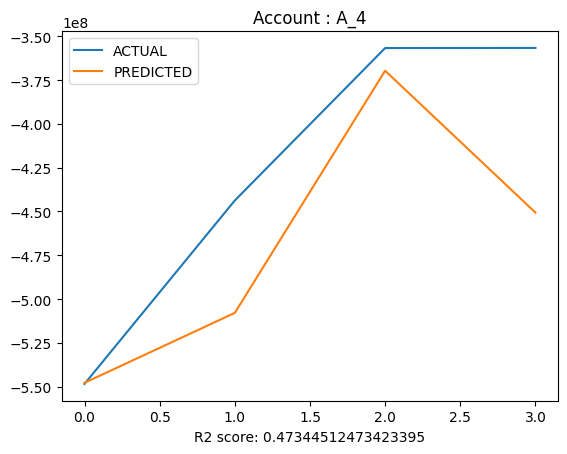

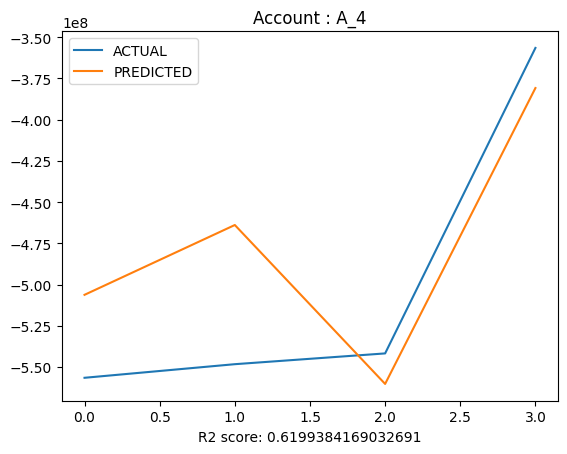

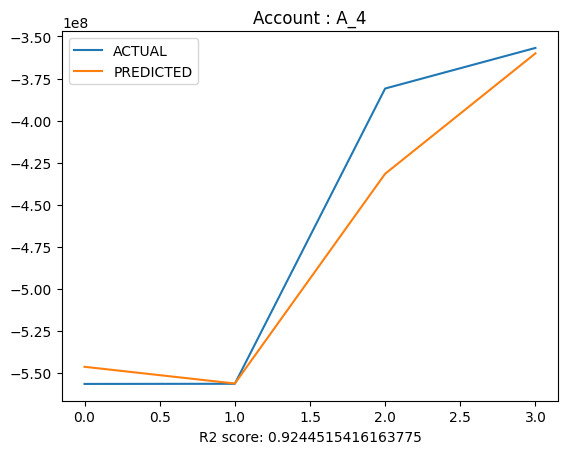

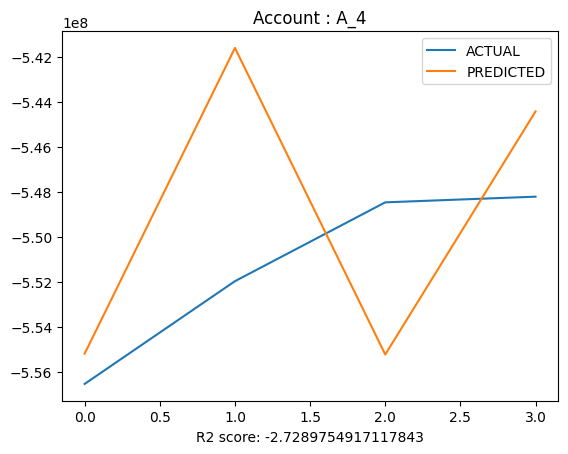

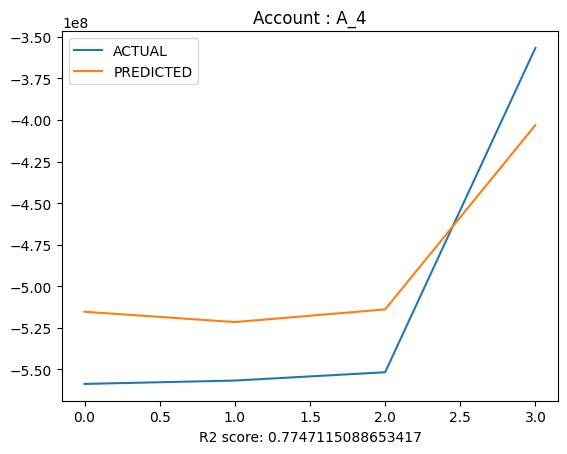

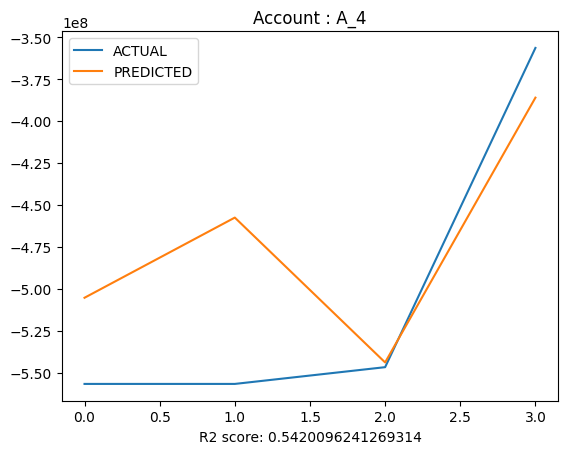

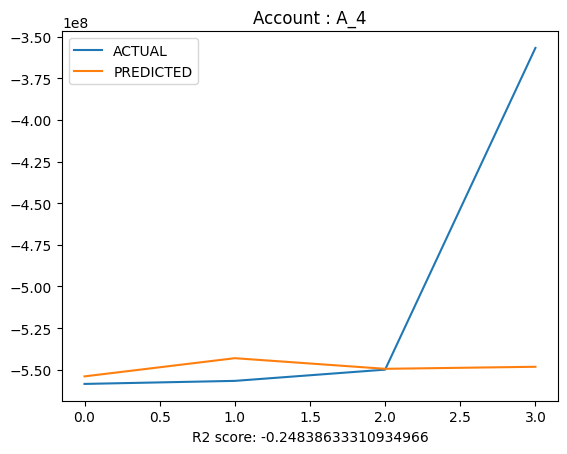

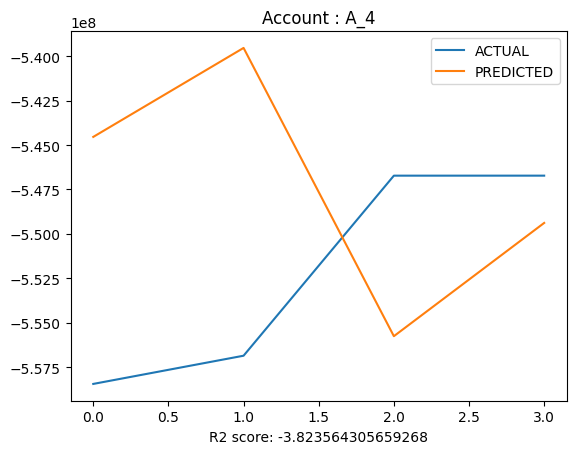

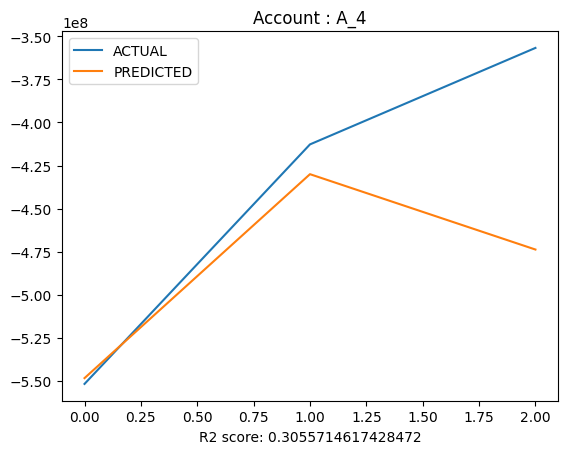

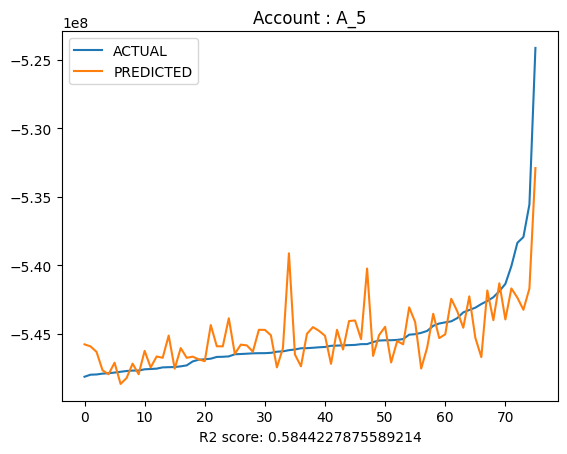

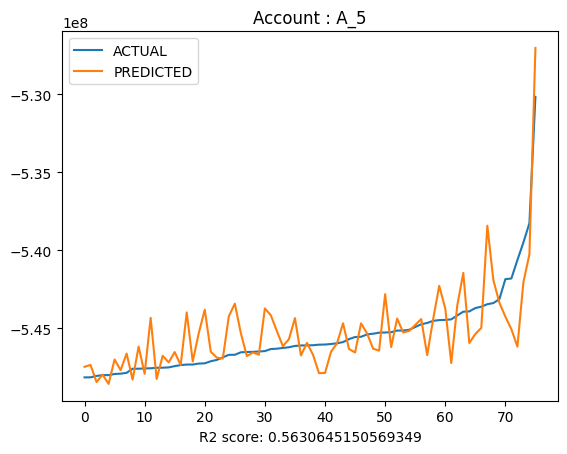

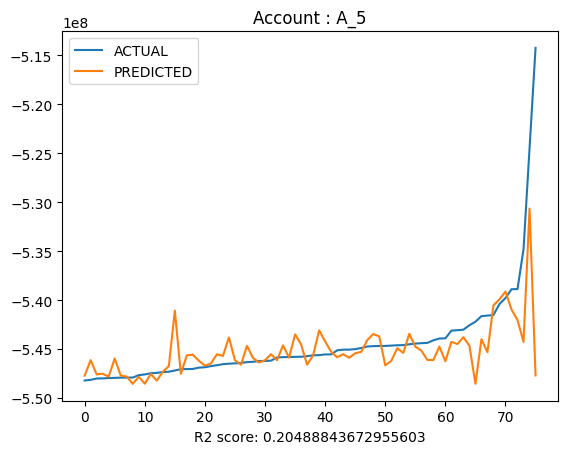

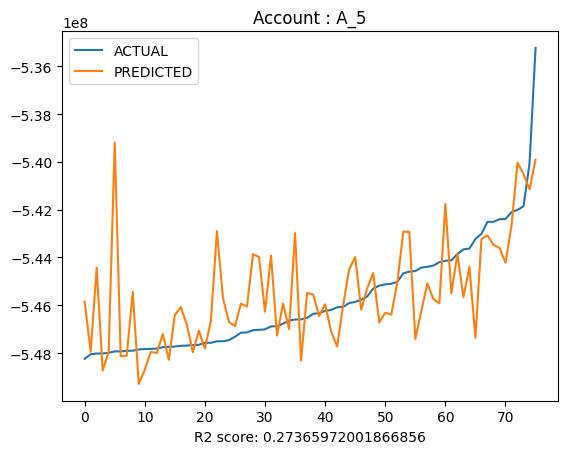

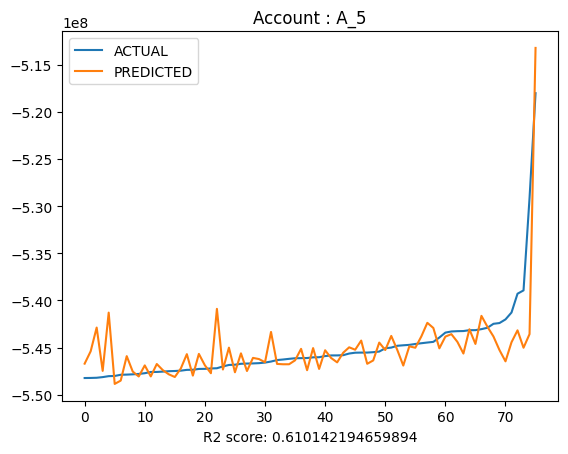

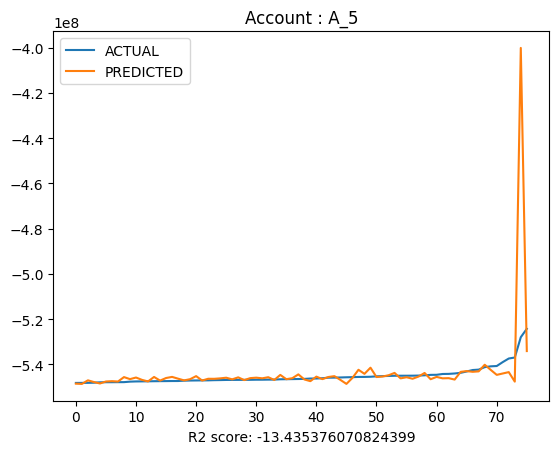

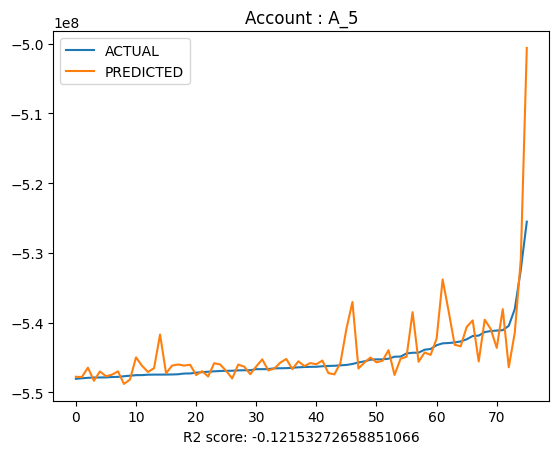

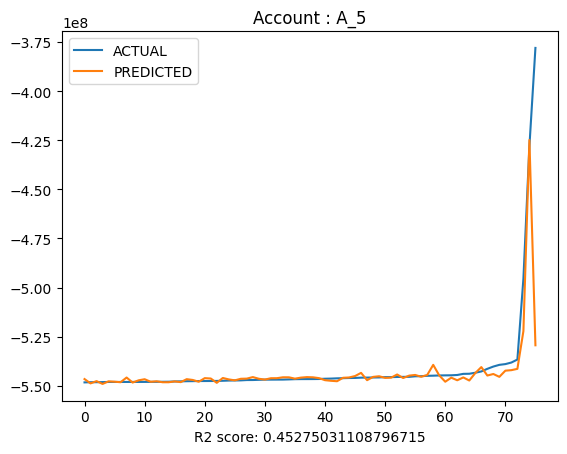

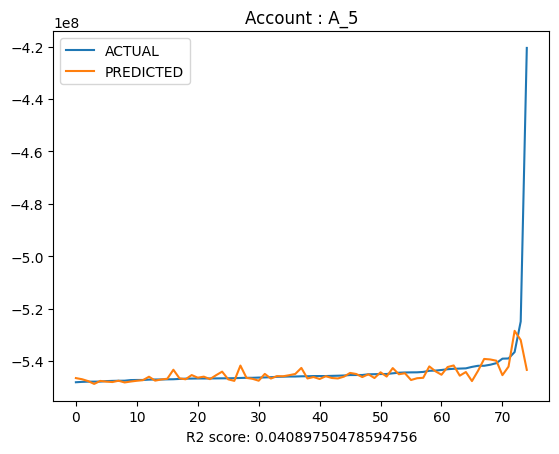

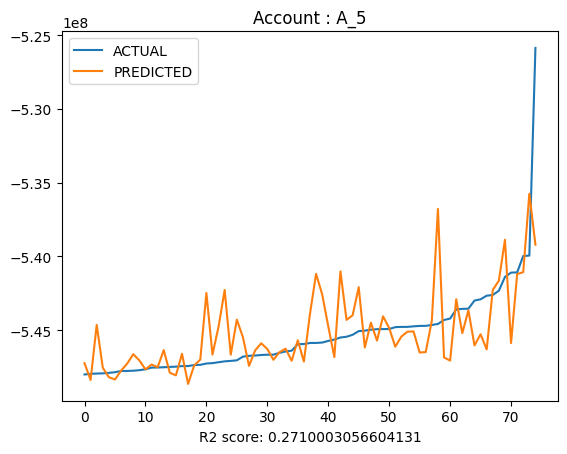

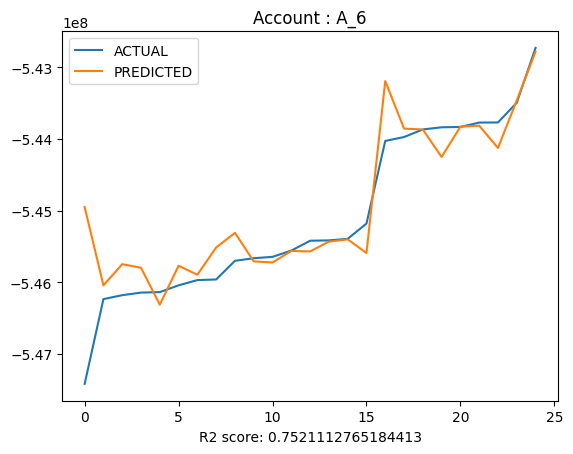

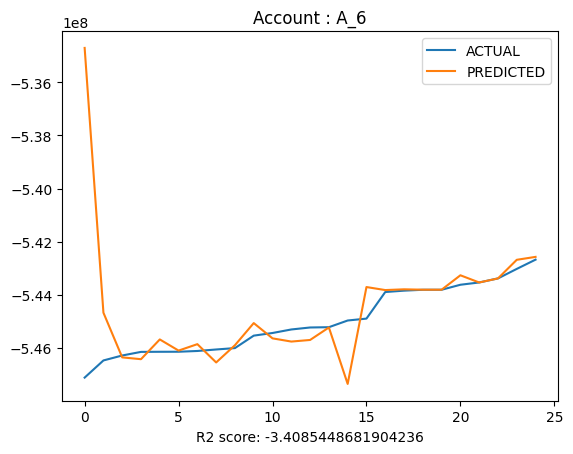

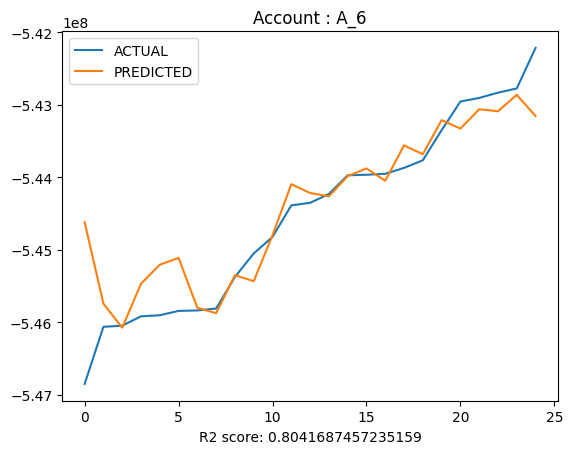

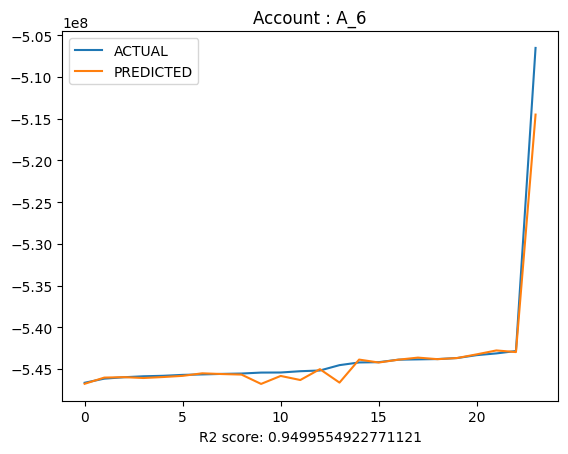

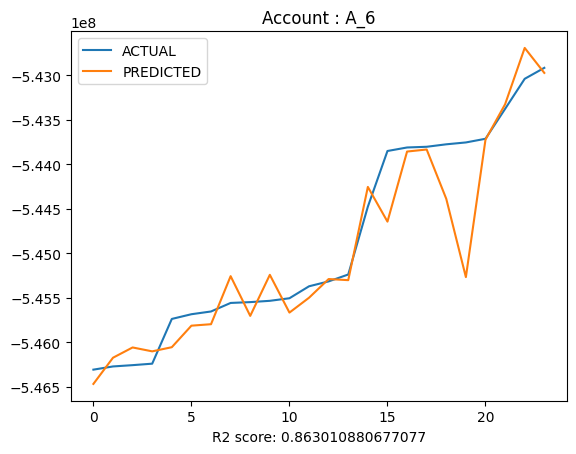

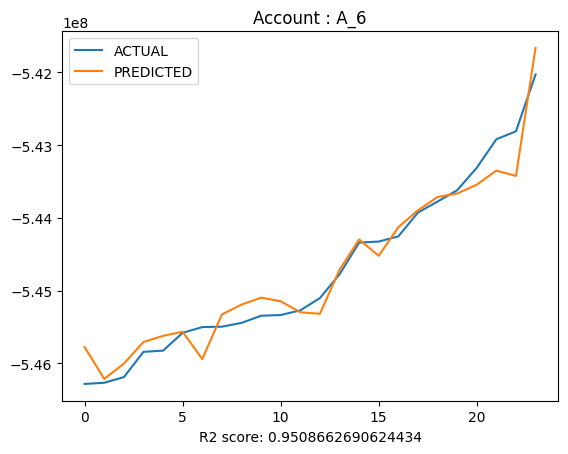

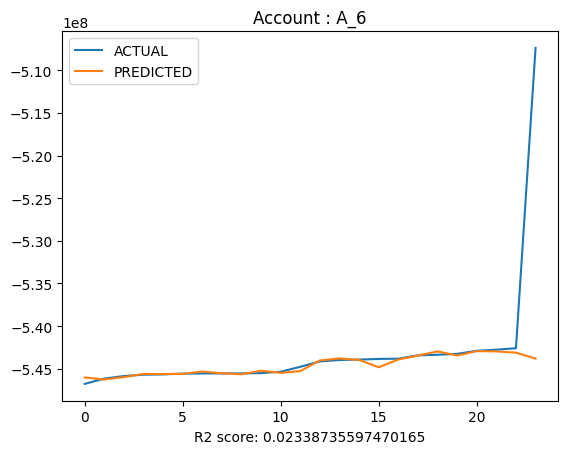

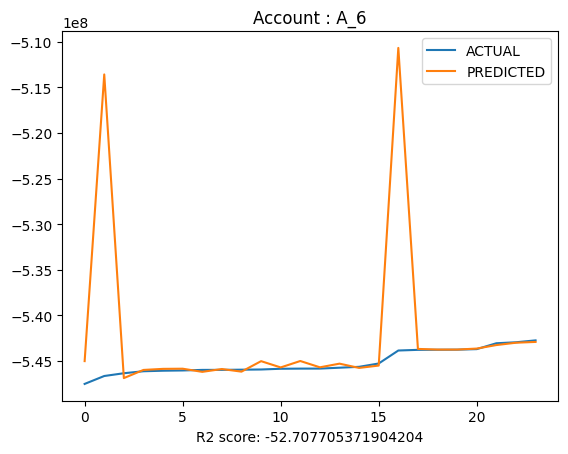

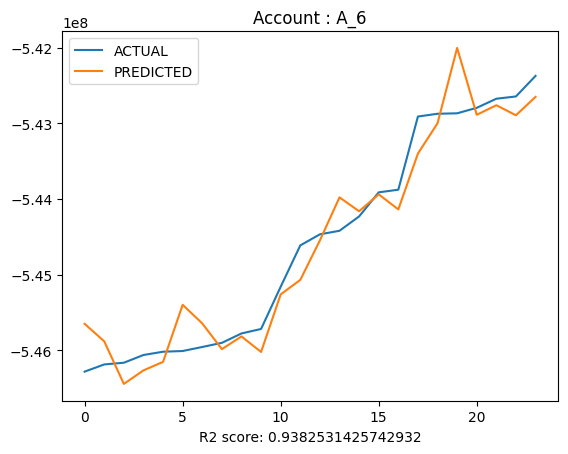

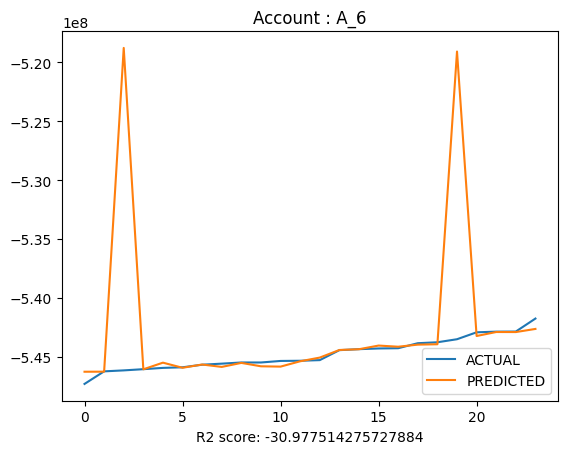

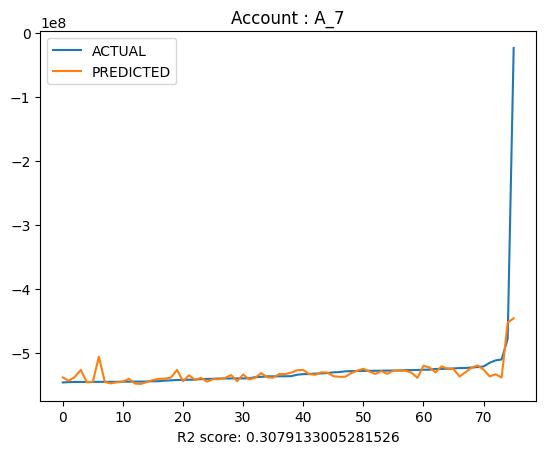

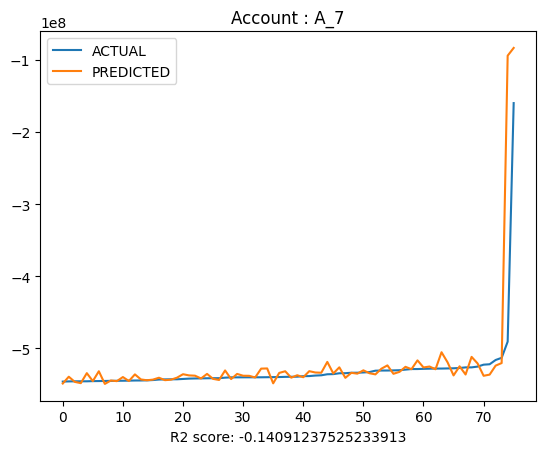

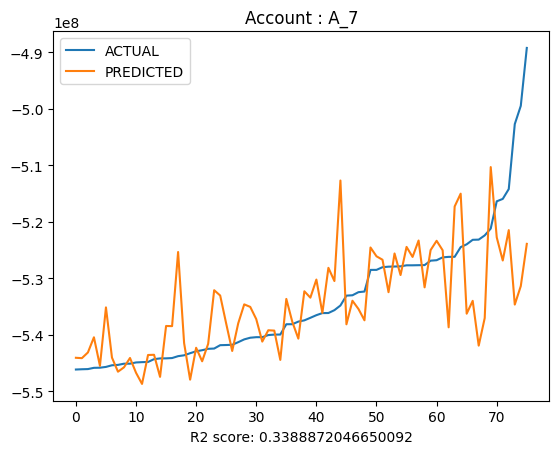

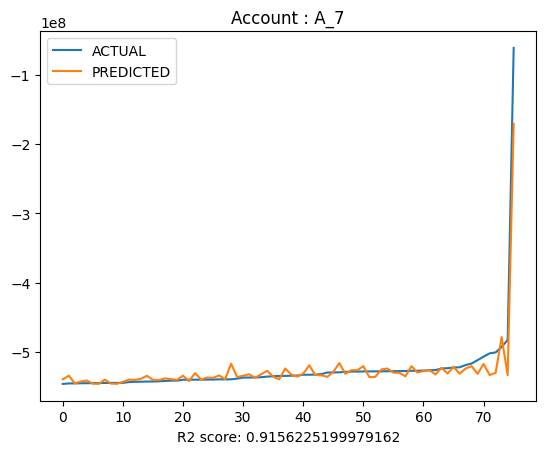

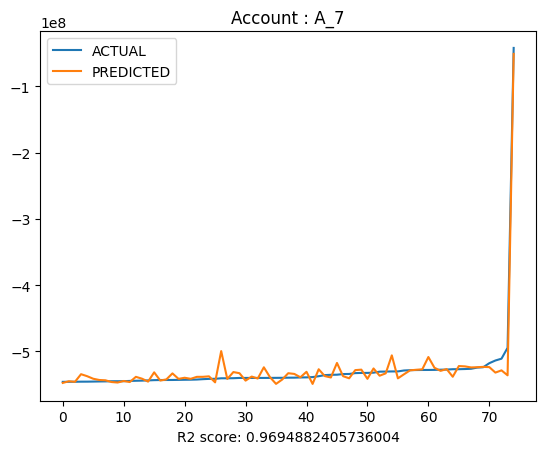

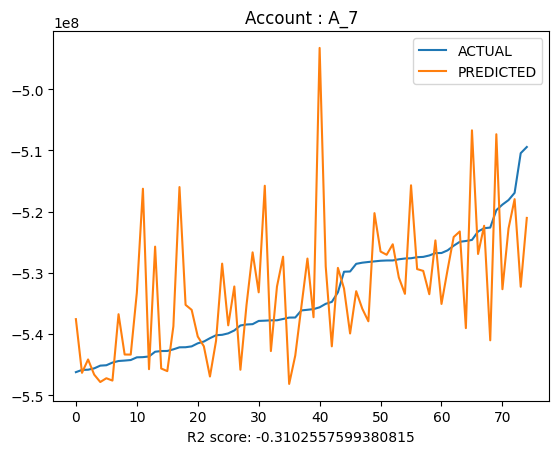

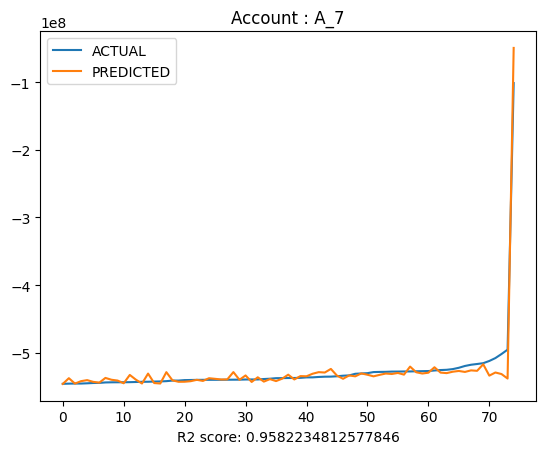

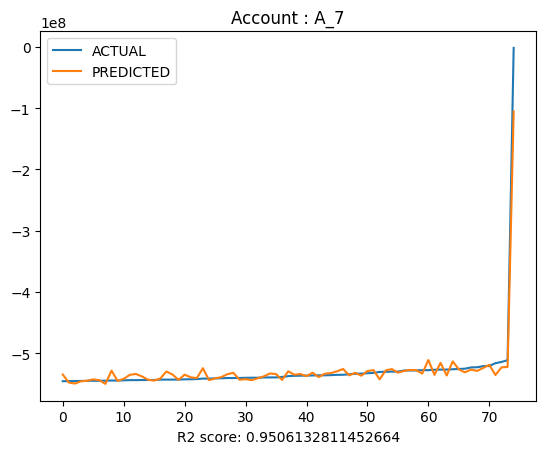

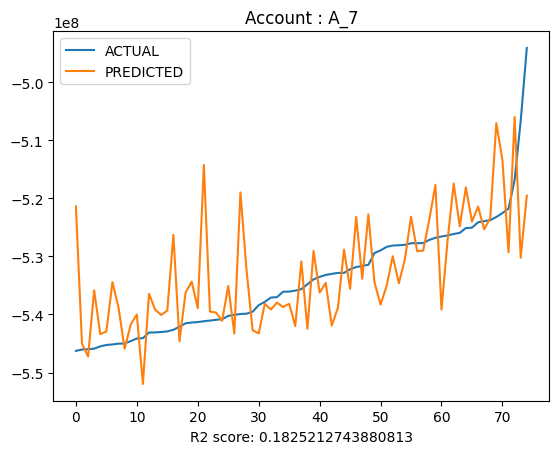

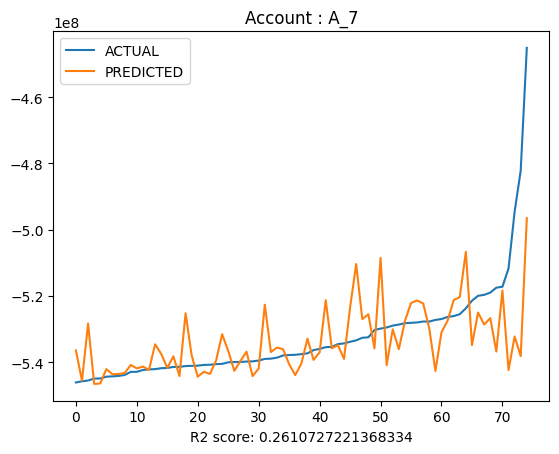

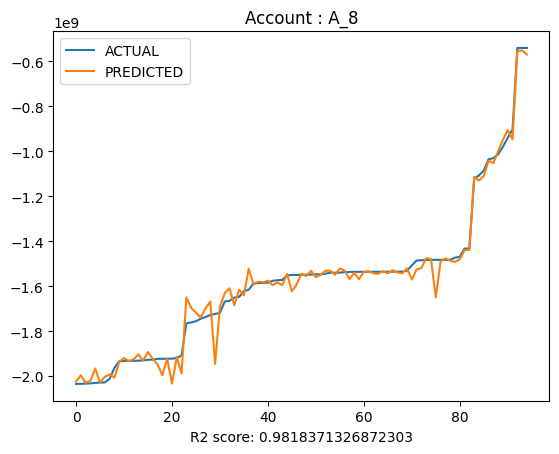

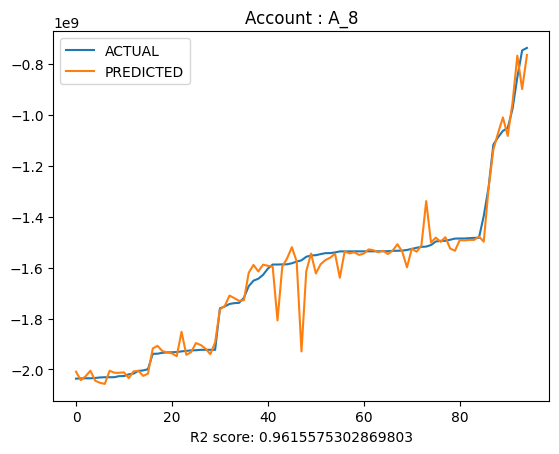

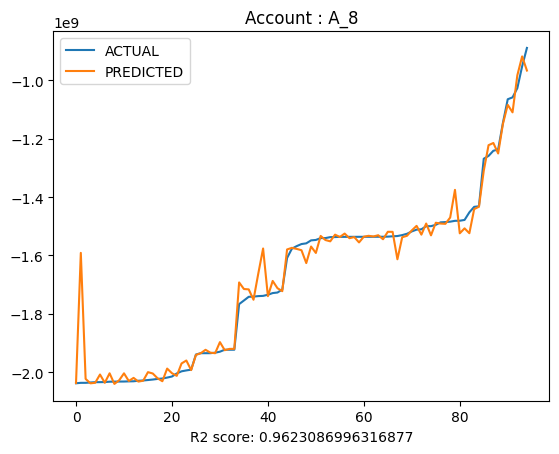

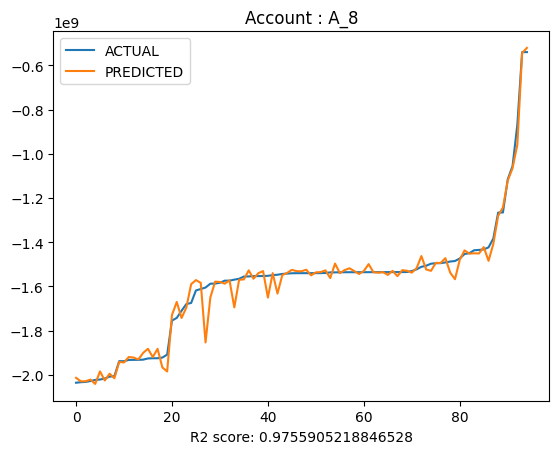

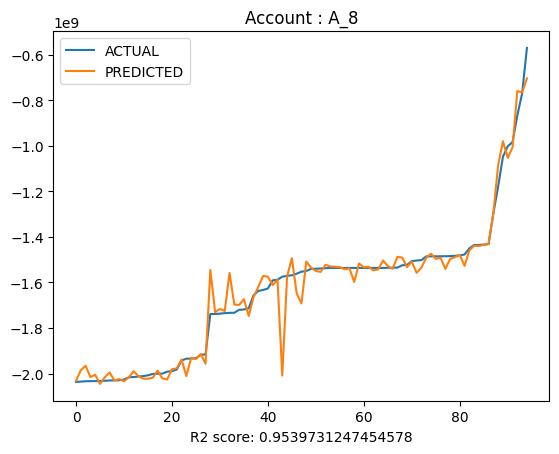

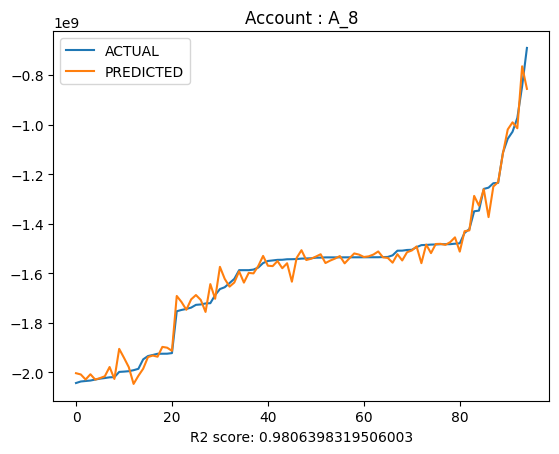

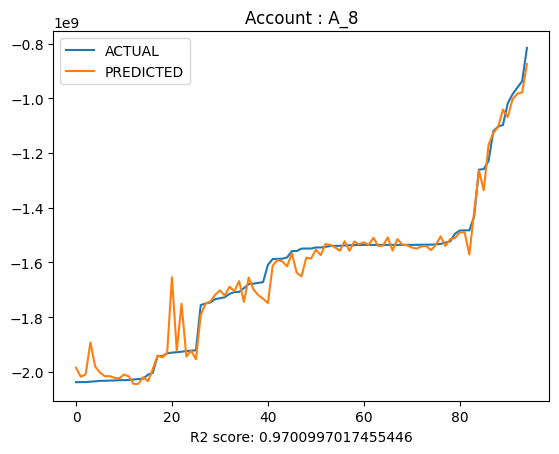

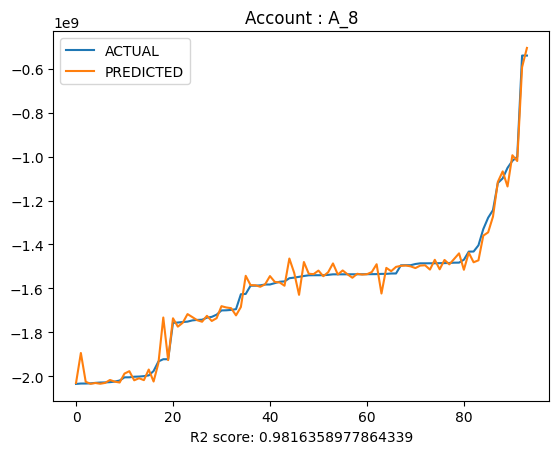

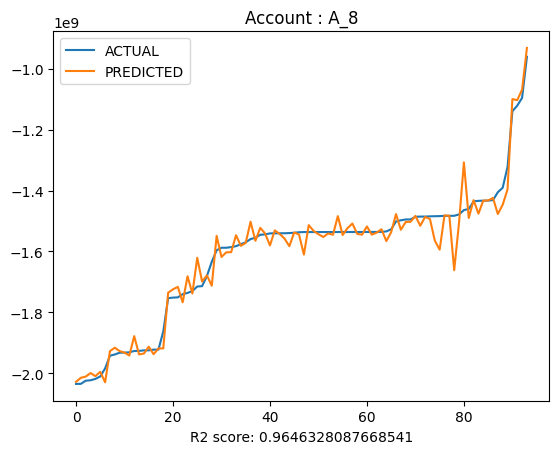

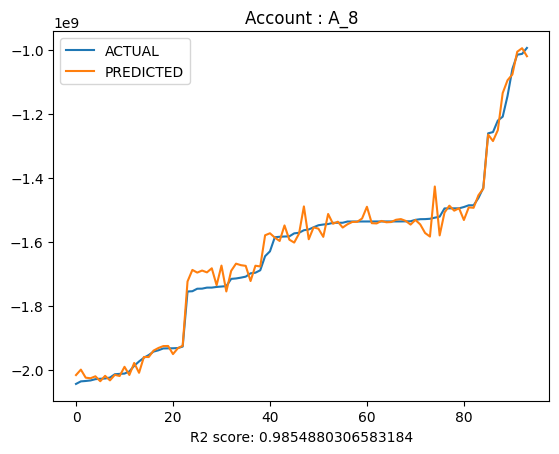

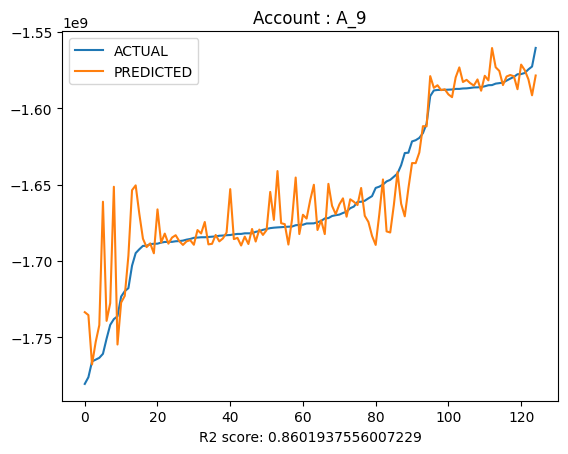

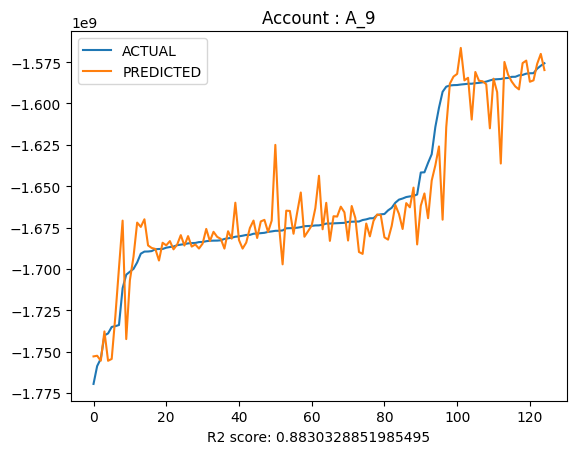

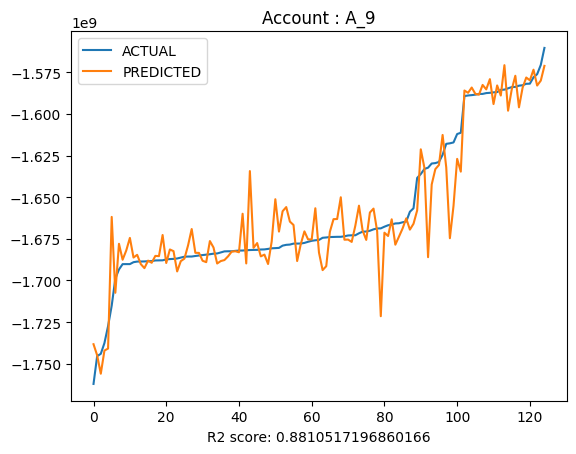

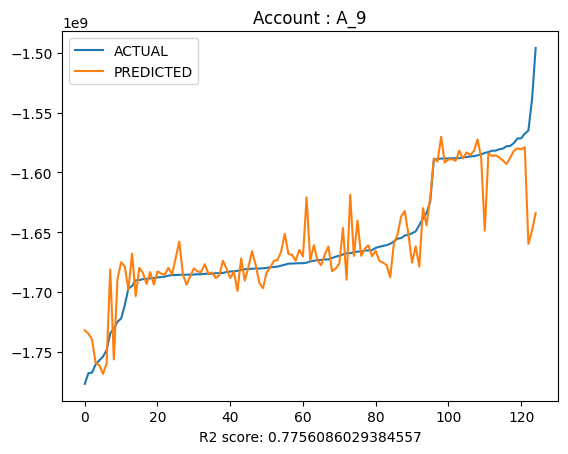

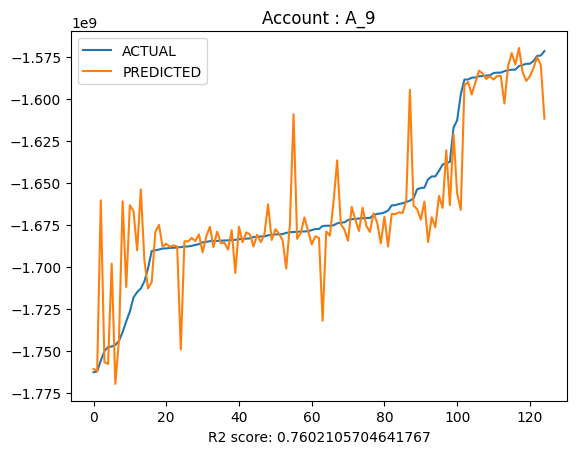

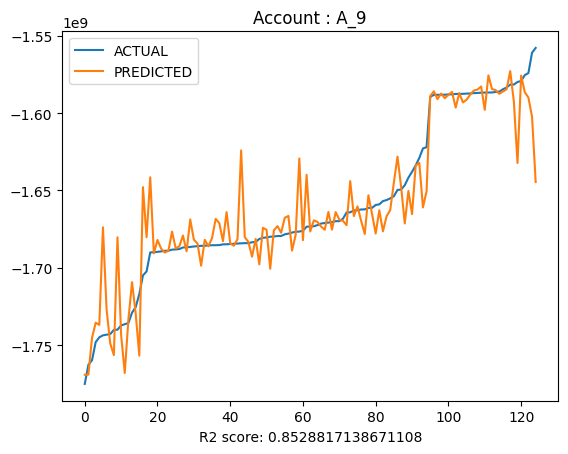

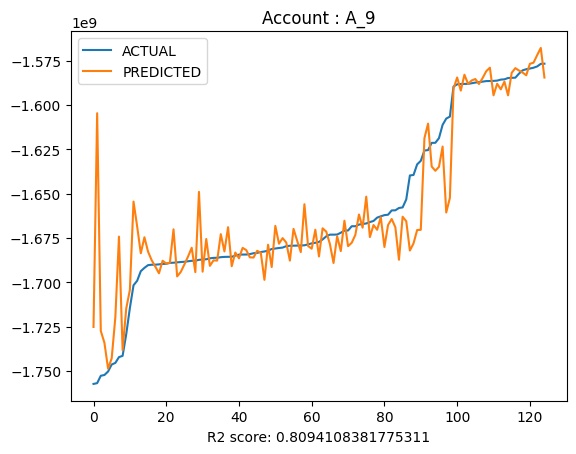

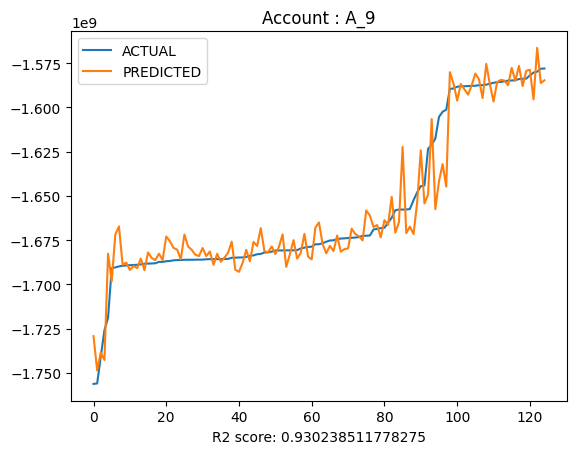

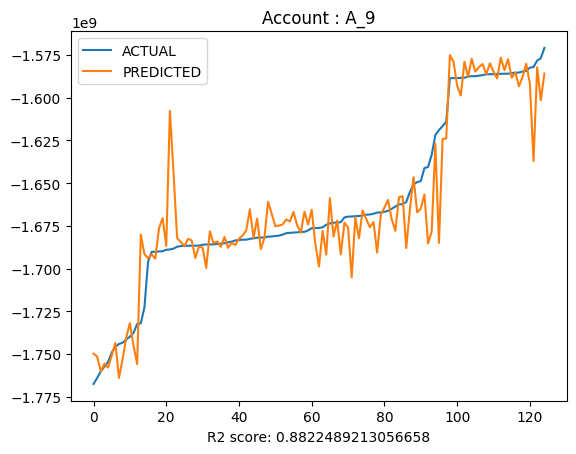

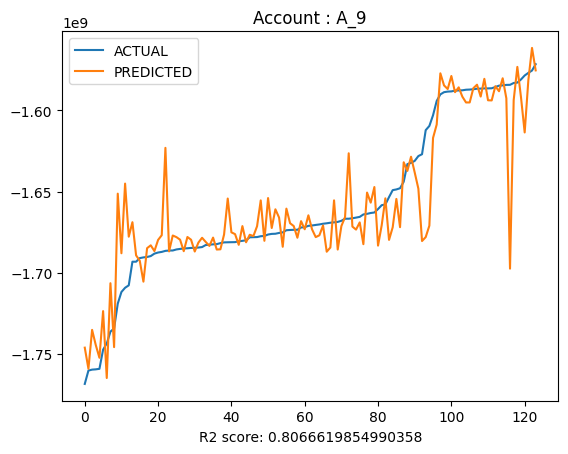

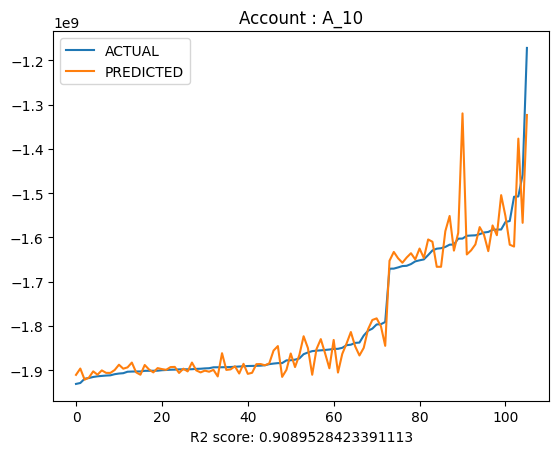

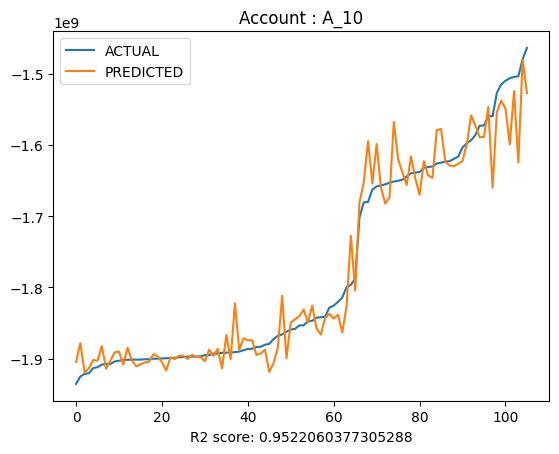

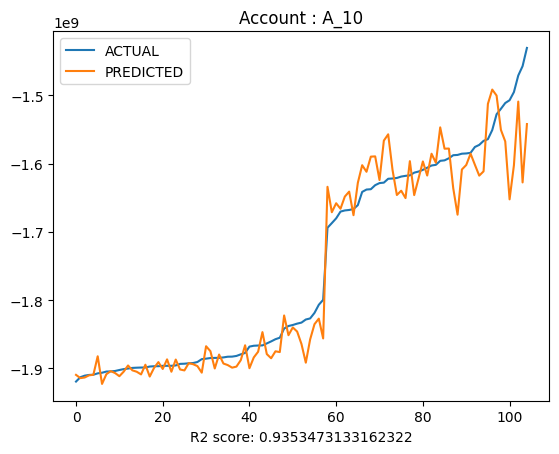

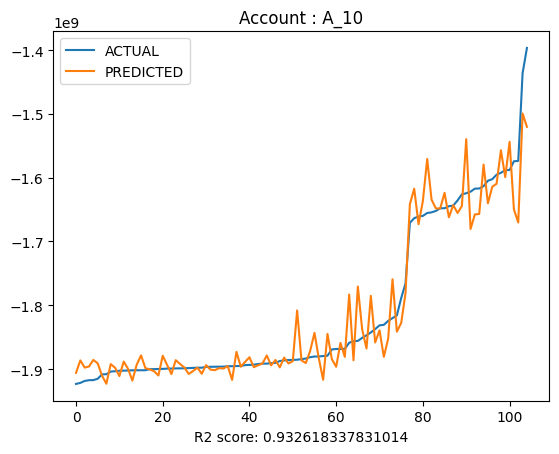

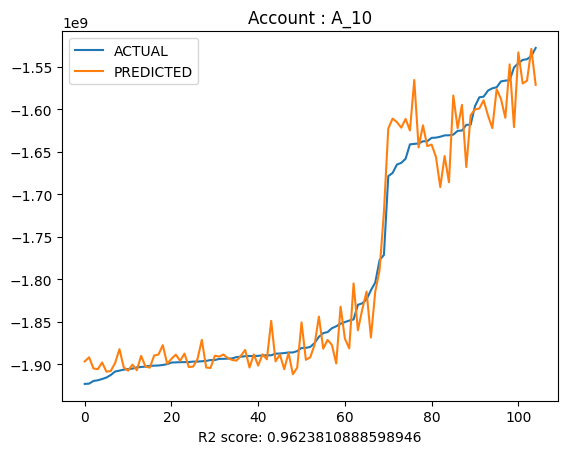

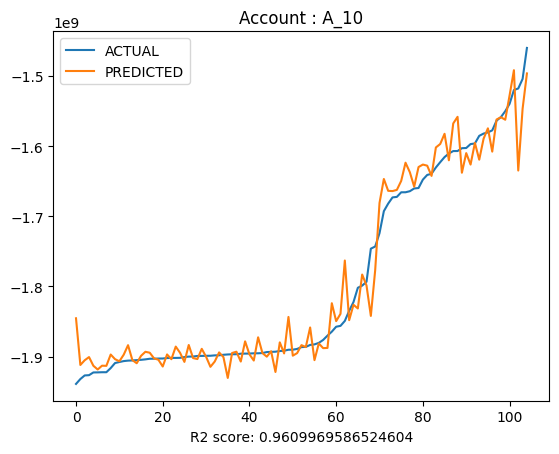

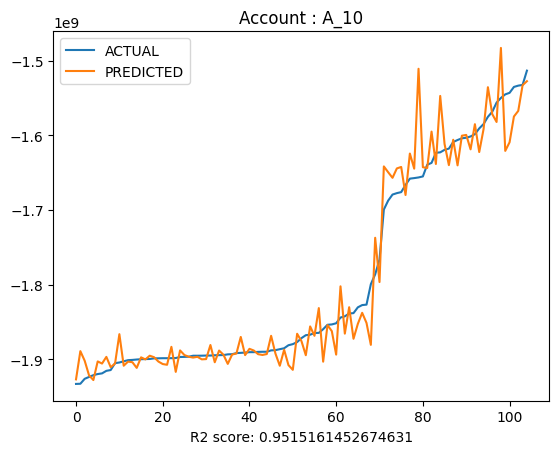

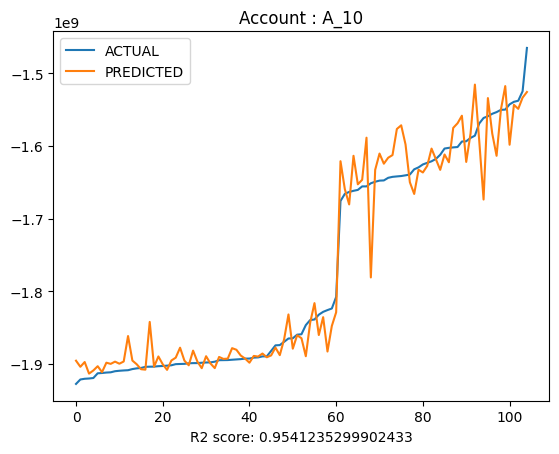

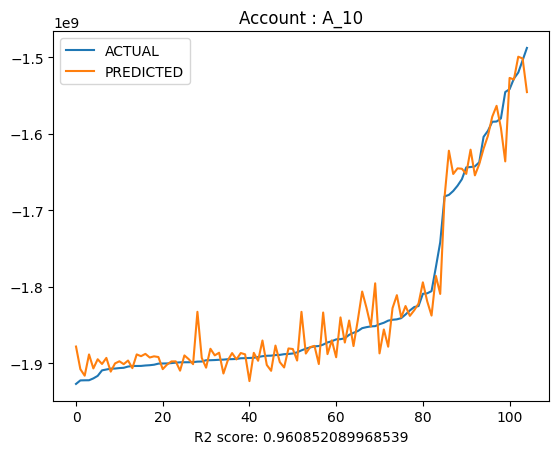

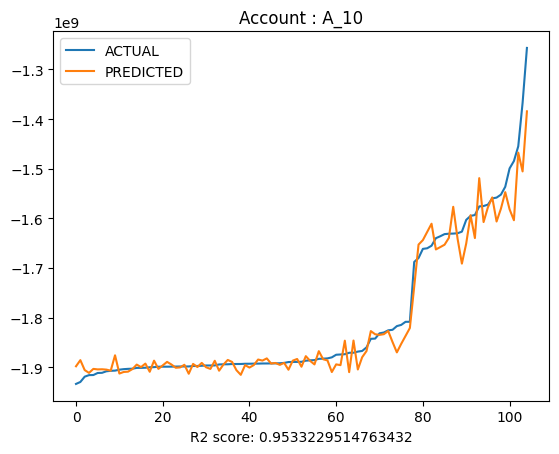

In [26]:
for acc in unique_accounts:
    print("\nAccount : " + acc)
    balance_prediction(acc)